In [1]:
# good accuracy for 0 and 1
# class balanced
# classification model
# Feature Selection - RFE, DT, RF
# High accyracy, high TPR, low FPR

In [2]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.style.use('ggplot')

In [5]:
import os
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\GitHub_projects\\IITR\\Nicholas_Dsouza_Assignments'

# Problem statement

# Data Acquisition

In [6]:
df = pd.read_csv("Attrition-1.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
print("Number of Rows:" , df.shape[0])
print("Number of Columns:" , df.shape[1])

Number of Rows: 1470
Number of Columns: 35


In [9]:
type(df.columns)

pandas.core.indexes.base.Index

In [10]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [11]:
categorical = list(df.select_dtypes(include="object").columns)
print("Categorical features:\n", categorical)
print("\n")
numerical = list(df.select_dtypes(exclude = "object").columns)
print ("Continous features:\n", numerical)

Categorical features:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Continous features:
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [12]:
# Five point Summary of numerical attributes
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [13]:
# Five point Summary of cattegorical attributes
df.describe(include="object").T

count unique                     top  freq
Attrition       1470      2                      No  1233
BusinessTravel  1470      3           Travel_Rarely  1043
Department      1470      3  Research & Development   961
EducationField  1470      6           Life Sciences   606
Gender          1470      2                    Male   882
JobRole         1470      9         Sales Executive   326
MaritalStatus   1470      3                 Married   673
Over18          1470      1                       Y  1470
OverTime        1470      2                      No  1054

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data Preparation

## Null Values

In [15]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [16]:
df.isnull().sum()[df.isnull().sum()!=0]

Series([], dtype: int64)

In [17]:
# As we have seen, that there are no Null values in the dataset 

# Univariate Analysis

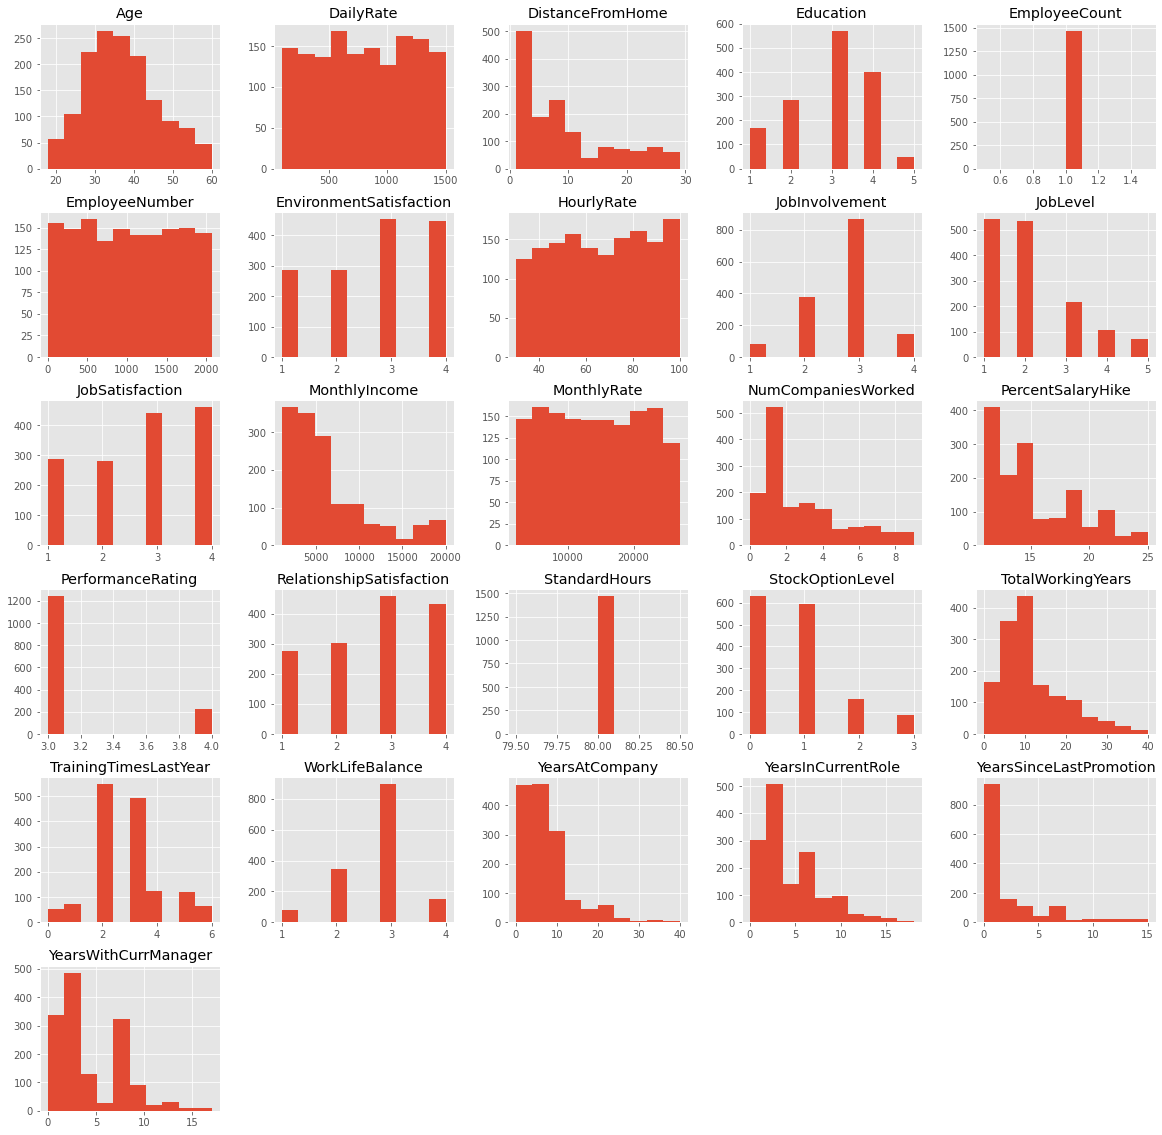

In [18]:
df.hist(figsize=(20, 20))
plt.show()

In [19]:
# The numeric features have continuous and distrete valeus.
# Couple of distributions are right skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany), this can be tacked by transforming the data, to make it normally distributed.
# Age is sligthly right-skewed suggesting that the employees are middle aged (36 years) rather than fresh grads out of college.
# EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
# Employee Number is used to uniquely identify employees.

## Converting Categoric to Numeric

In [20]:
for i in df.describe(include="object"):
    print(" ")
    print("**********",i,"**********")
    print(df[i].value_counts(normalize=True)*100)
    print(" ")

 
********** Attrition **********
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64
 
 
********** BusinessTravel **********
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: BusinessTravel, dtype: float64
 
 
********** Department **********
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64
 
 
********** EducationField **********
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: EducationField, dtype: float64
 
 
********** Gender **********
Male      60.0
Female    40.0
Name: Gender, dtype: float64
 
 
********** JobRole **********
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare 

In [21]:
# Nominal: Attrition, MaritalStatus, Department, EducationField, Gender, JobRole, Over18, OverTime 
# Ordinal: BusinessTravel

# We will use One Hot Encoding to handle Nominal data, as we dont want to induce order to the data using Label Encoding
# The only feature which is Ordinal is BusinessTravel which we will handle using Label Encoding
# Either Nominal or Ordinal data, we can use replace() to handle dichotomous categorical data

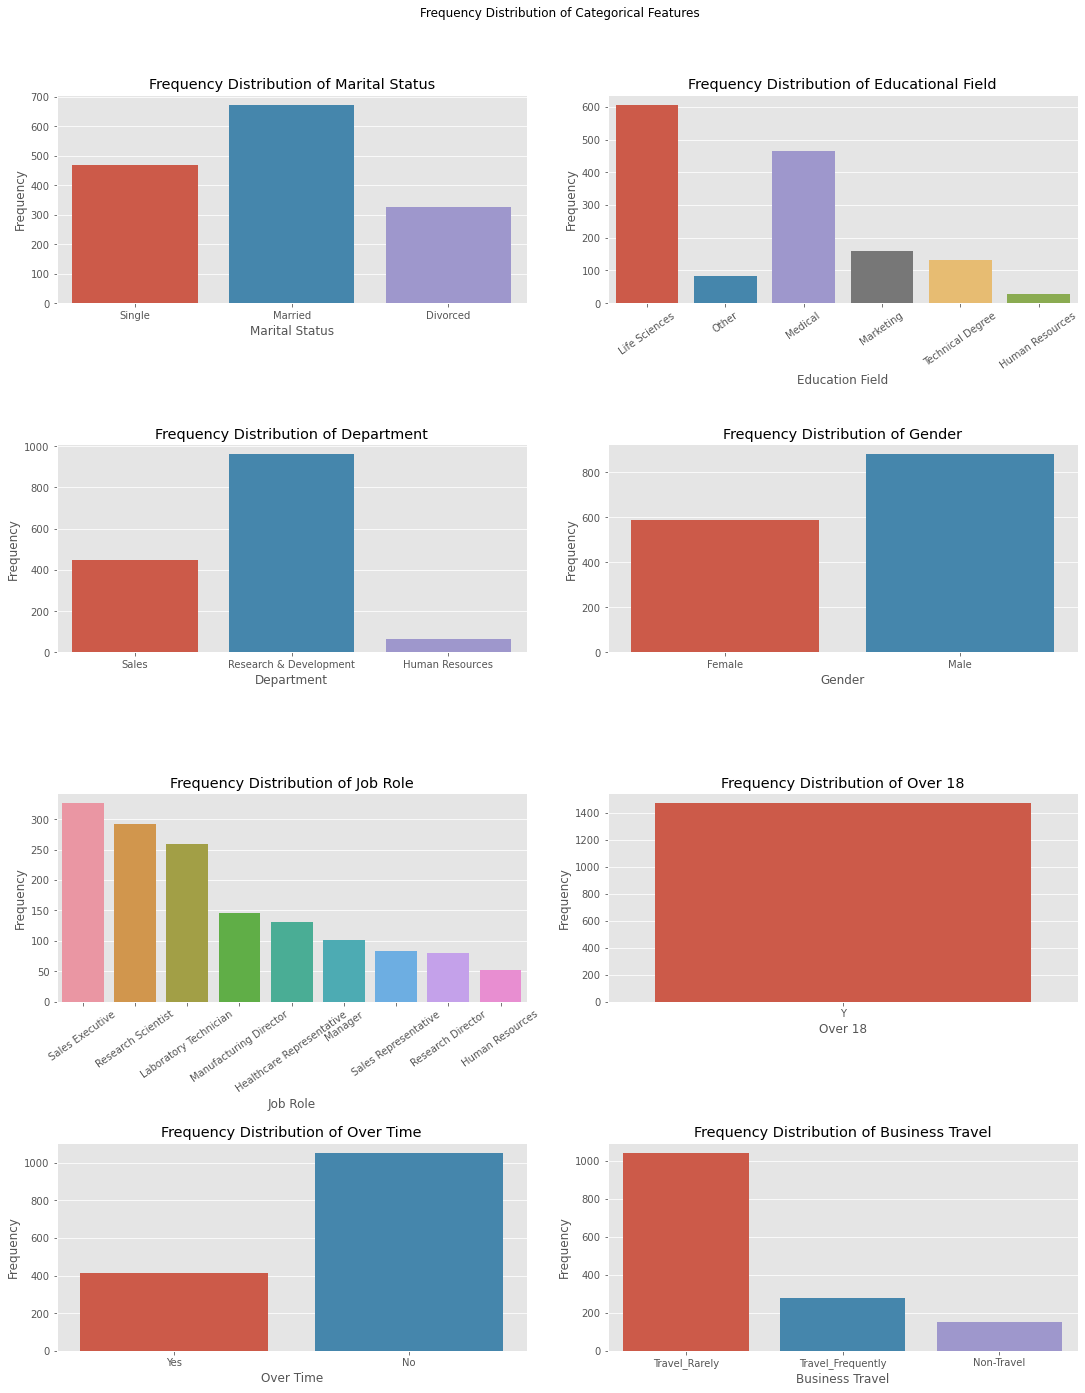

In [22]:
fig, ax= plt.subplots(4,2,figsize=(16,20))

plt.suptitle("Frequency Distribution of Categorical Features")

plt.tight_layout(pad=5, h_pad=12)

sns.countplot(df['MaritalStatus'], ax=ax[0][0])
ax[0][0].set_xlabel('Marital Status')
ax[0][0].set_ylabel('Frequency')
ax[0][0].set_title('Frequency Distribution of Marital Status')

sns.countplot(df['EducationField'], ax=ax[0][1])
ax[0][1].set_xlabel('Education Field')
ax[0][1].set_ylabel('Frequency')
ax[0][1].set_title('Frequency Distribution of Educational Field')
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation="35")


sns.countplot(df['Department'], ax=ax[1][0])
ax[1][0].set_xlabel('Department')
ax[1][0].set_ylabel('Frequency',size=12)
ax[1][0].set_title('Frequency Distribution of Department')

sns.countplot(df['Gender'], ax=ax[1][1])
ax[1][1].set_xlabel('Gender')
ax[1][1].set_ylabel('Frequency',size=12)
ax[1][1].set_title('Frequency Distribution of Gender')

sns.countplot(df['JobRole'], ax=ax[2][0])
ax[2][0].set_xlabel('Job Role')
ax[2][0].set_ylabel('Frequency',size=12)
ax[2][0].set_title('Frequency Distribution of Job Role')
ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation="35")

sns.countplot(df['Over18'], ax=ax[2][1])
ax[2][1].set_xlabel('Over 18')
ax[2][1].set_ylabel('Frequency',size=12)
ax[2][1].set_title('Frequency Distribution of Over 18')

sns.countplot(df['OverTime'], ax=ax[3][0])
ax[3][0].set_xlabel('Over Time')
ax[3][0].set_ylabel('Frequency',size=12)
ax[3][0].set_title('Frequency Distribution of Over Time')

sns.countplot(df['BusinessTravel'], ax=ax[3][1])
ax[3][1].set_xlabel('Business Travel')
ax[3][1].set_ylabel('Frequency',size=12)
ax[3][1].set_title('Frequency Distribution of Business Travel')

plt.show()

Insights from Categoric Predictors:
* Majority of the employees are Married followed by single marital status. 
* Most of the employees are from the Life Sciences and Medical sector and the least number of employees are from the HR department.
* Looks like most of the employees work in the R&D department in the organization followed by Sales. Least number of employees from the HR departemnt in the survey.
* Males are the ones who are in majority.
* The job roles of employees mostly comprise of Sales, research scientist and lab technicians and few people from management.
* All the employees aree above 18 years.
* Most people do not work overtime.
* Most employees travel rarely.

In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

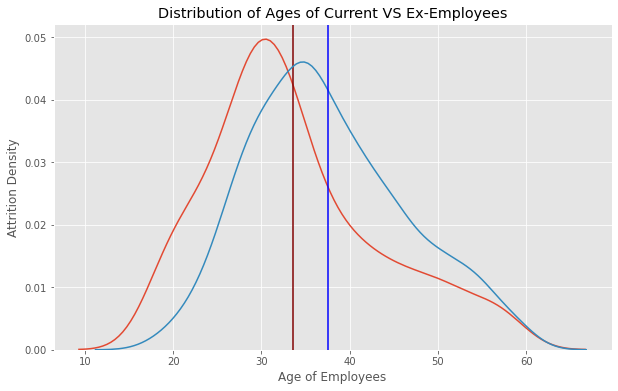

In [24]:
plt.figure(figsize=(10, 6))
plt.title("Distribution of Ages of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","Age"], hist=False)  # Current Employees Age
plt.axvline(df.loc[df['Attrition']=="Yes","Age"].mean(), color="maroon")
sns.distplot(df.loc[df['Attrition']=="No","Age"], hist=False)  # Ex-Employees Age
plt.axvline(df.loc[df['Attrition']=="No","Age"].mean(), color="blue")
plt.xlabel("Age of Employees")
plt.ylabel("Attrition Density")
plt.show()

In [25]:
df.loc[df['Attrition']=="No","Age"].median()

36.0

In [26]:
# Most employees who leave the organization are people of age around 33 while the ones that stay have an average age of 37. 
# So, the employees who usually leave are younger than those who are current employees in the company

In [27]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df['DistanceFromHome'].min(), df['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [28]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(df[df['Attrition'] == 'No']['DistanceFromHome'].mean(), df[df['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


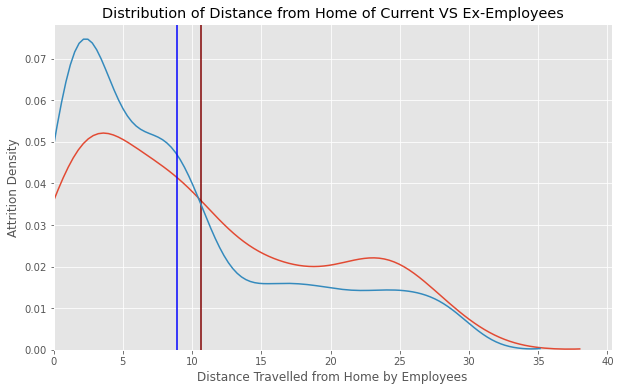

In [29]:
plt.figure(figsize=(10, 6))
plt.title("Distribution of Distance from Home of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","DistanceFromHome"], hist=False)  # Current Employees Age
plt.axvline(df.loc[df['Attrition']=="Yes","DistanceFromHome"].mean(), color="maroon")
sns.distplot(df.loc[df['Attrition']=="No","DistanceFromHome"], hist=False)  # Ex-Employees Age
plt.axvline(df.loc[df['Attrition']=="No","DistanceFromHome"].mean(), color="blue")
plt.xlim(0)

plt.xlabel("Distance Travelled from Home by Employees")
plt.ylabel("Attrition Density")
plt.show()

In [30]:
# Employees who leave the company usually cover 2 miles more than the employees who currently work in the organization.
# For the employees (currently and ex-employees) most stay closer to the work place especially the ones who are still employees in the organization.

In [31]:
print("Number of training times last year varies from {} to {} years.".format(df['TrainingTimesLastYear'].min(), df['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


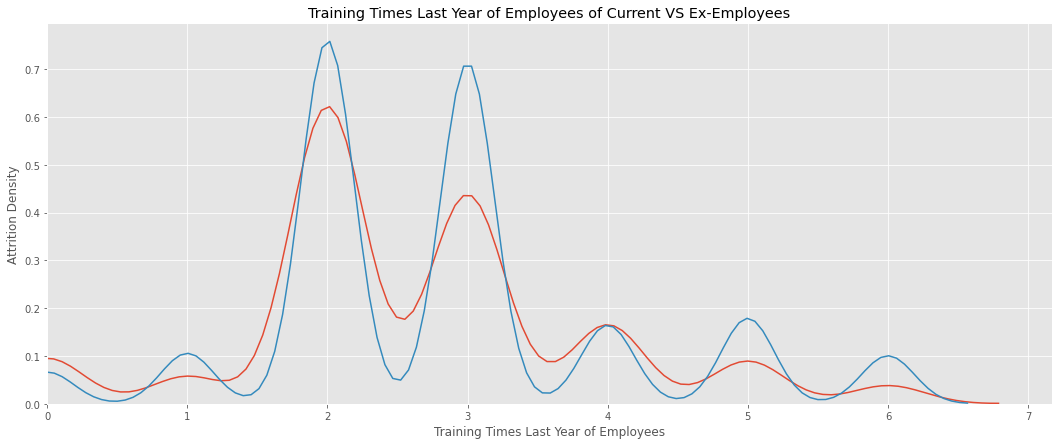

In [32]:
plt.figure(figsize=(18, 7))
plt.title("Training Times Last Year of Employees of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","TrainingTimesLastYear"], hist=False)  # Current Employees Age
sns.distplot(df.loc[df['Attrition']=="No","TrainingTimesLastYear"], hist=False)  # Ex-Employees Age
plt.xlim(0)

plt.xlabel("Training Times Last Year of Employees")
plt.ylabel("Attrition Density")
plt.show()

In [33]:
# This feature indicates how many years it has been since having the last training program
# We can say that it's 2-3 years since most employees have a training program.

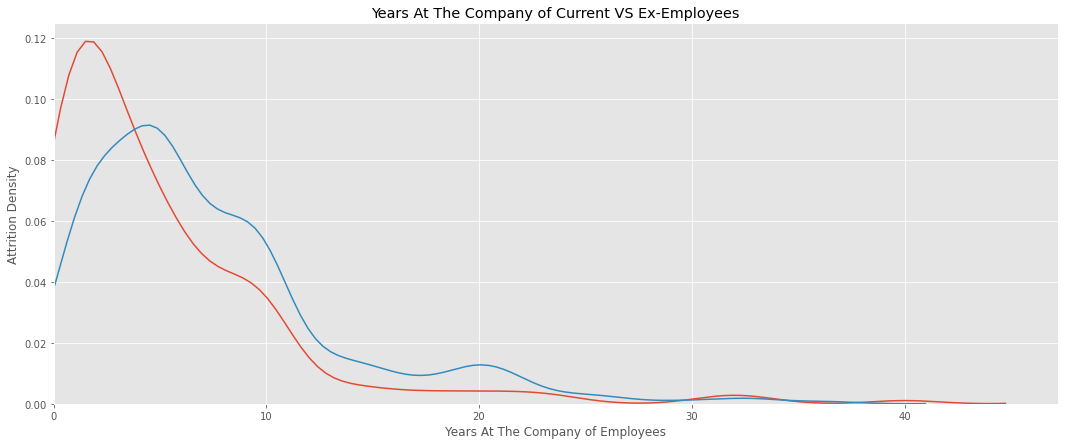

In [34]:
plt.figure(figsize=(18, 7))
plt.title("Years At The Company of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","YearsAtCompany"], hist=False)  # Current Employees Age
sns.distplot(df.loc[df['Attrition']=="No","YearsAtCompany"], hist=False)  # Ex-Employees Age
plt.xlim(0)

plt.xlabel("Years At The Company of Employees")
plt.ylabel("Attrition Density")
plt.show()

In [35]:
# The current employees usually have slightly more years of experience than employees who have left the company

In [36]:
print("Number of Years in the current role varies from {} to {} years.".format(df['YearsInCurrentRole'].min(), df['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


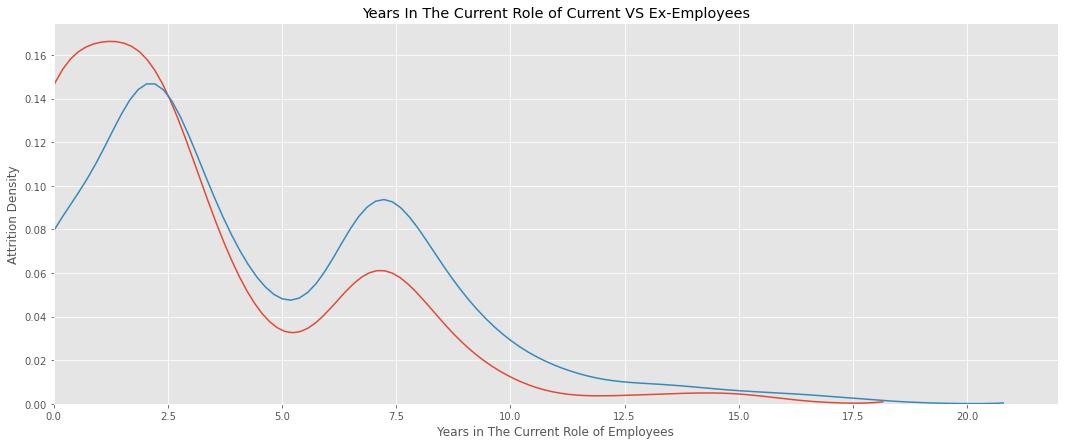

In [37]:
plt.figure(figsize=(18, 7))
plt.title("Years In The Current Role of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","YearsInCurrentRole"], hist=False)  # Current Employees Age
sns.distplot(df.loc[df['Attrition']=="No","YearsInCurrentRole"], hist=False)  # Ex-Employees Age
plt.xlim(0)

plt.xlabel("Years in The Current Role of Employees")
plt.ylabel("Attrition Density")
plt.show()

In [38]:
print("Number of Years since last promotion varies from {} to {} years.".format(df['YearsSinceLastPromotion'].min(), df['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


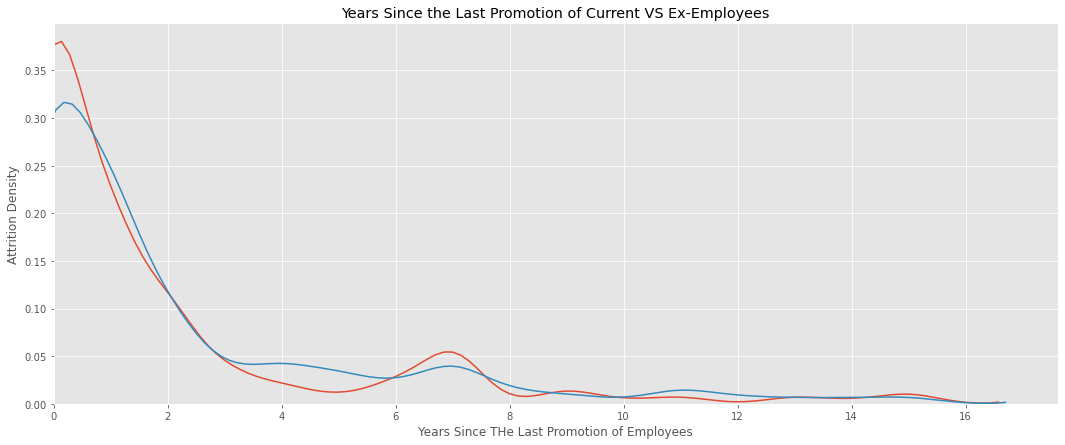

In [39]:
plt.figure(figsize=(18, 7))
plt.title("Years Since the Last Promotion of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","YearsSinceLastPromotion"], hist=False)  # Current Employees Age
sns.distplot(df.loc[df['Attrition']=="No","YearsSinceLastPromotion"], hist=False)  # Ex-Employees Age
plt.xlim(0)

plt.xlabel("Years Since THe Last Promotion of Employees")
plt.ylabel("Attrition Density")
plt.show()

In [40]:
print("Total working years varies from {} to {} years.".format(df['TotalWorkingYears'].min(), df['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


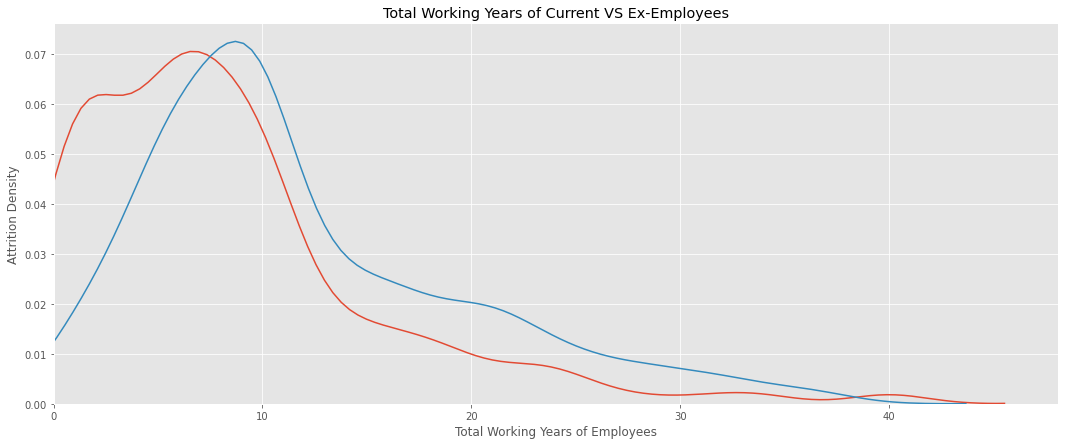

In [41]:
plt.figure(figsize=(18, 7))
plt.title("Total Working Years of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","TotalWorkingYears"], hist=False)  # Current Employees Age
sns.distplot(df.loc[df['Attrition']=="No","TotalWorkingYears"], hist=False)  # Ex-Employees Age
plt.xlim(0)

plt.xlabel("Total Working Years of Employees")
plt.ylabel("Attrition Density")
plt.show()

In [42]:
df.loc[df['Attrition']=="No","TotalWorkingYears"].mean()

11.862935928629359

In [43]:
# Most people who have left the company have around 8 working years in the company, while the one who have decided to stay have slightly more working years (11 years)

In [44]:
print("Number of Years wit current manager varies from {} to {} years.".format(df['YearsWithCurrManager'].min(), df['YearsWithCurrManager'].max()))

Number of Years wit current manager varies from 0 to 17 years.


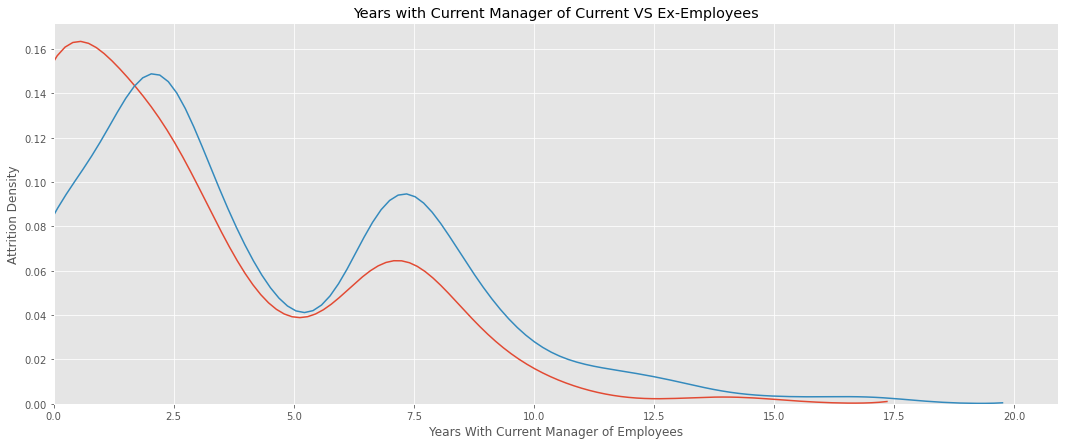

In [45]:
plt.figure(figsize=(18, 7))
plt.title("Years with Current Manager of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","YearsWithCurrManager"], hist=False)  # Current Employees Age
sns.distplot(df.loc[df['Attrition']=="No","YearsWithCurrManager"], hist=False)  # Ex-Employees Age
plt.xlim(0)

plt.xlabel("Years With Current Manager of Employees")
plt.ylabel("Attrition Density")
plt.show()

In [46]:
print("Employee Hourly Rate varies from ${} to ${}.".format(df['HourlyRate'].min(), df['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [47]:
print("Employee Daily Rate varies from ${} to ${}.".format(df['DailyRate'].min(), df['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [48]:
print("Employee Monthly Rate varies from ${} to ${}.".format(df['MonthlyRate'].min(), df['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [49]:
print("Employee Monthly Income varies from ${} to ${}.".format(df['MonthlyIncome'].min(), df['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


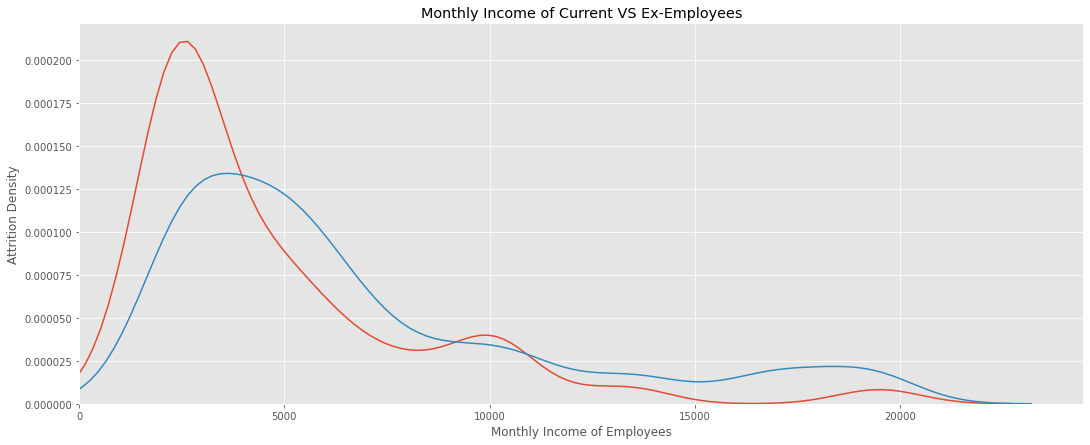

In [50]:
plt.figure(figsize=(18, 7))
plt.title("Monthly Income of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","MonthlyIncome"], hist=False)  # Current Employees Age
sns.distplot(df.loc[df['Attrition']=="No","MonthlyIncome"], hist=False)  # Ex-Employees Age
plt.xlim(0)

plt.xlabel("Monthly Income of Employees")
plt.ylabel("Attrition Density")
plt.show()

In [51]:
df.loc[df['Attrition']=="No","MonthlyIncome"].mean()

6832.739659367397

In [52]:
# Most employees who left were payed (approx) 5000$ while the ones who stayed were payed (approx) 7000$ 

In [53]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(df['PercentSalaryHike'].min(), df['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


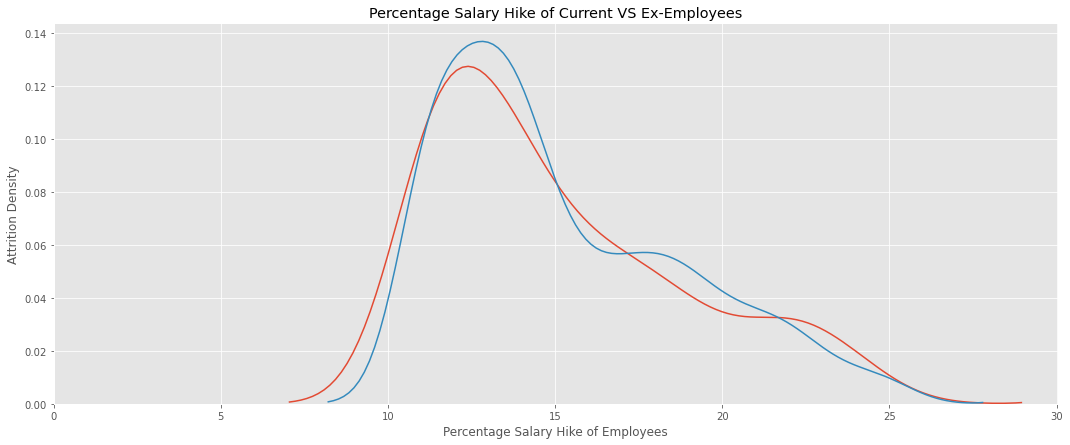

In [54]:
plt.figure(figsize=(18, 7))
plt.title("Percentage Salary Hike of Current VS Ex-Employees")
sns.distplot(df.loc[df['Attrition']=="Yes","PercentSalaryHike"], hist=False)  # Current Employees Age
sns.distplot(df.loc[df['Attrition']=="No","PercentSalaryHike"], hist=False)  # Ex-Employees Age
plt.xlim(0)

plt.xlabel("Percentage Salary Hike of Employees")
plt.ylabel("Attrition Density")
plt.show()

In [55]:
# In both the cases, whether the employee is currently working or has worked most employees got an increment of 15%.

---------- Age ----------


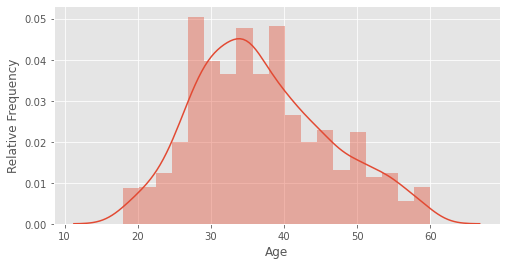

Mean:  36.923809523809524
Median:  36.0

---------- DailyRate ----------


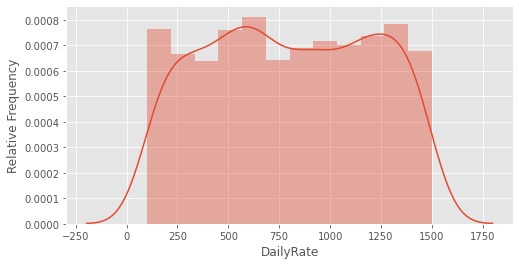

Mean:  802.4857142857143
Median:  802.0

---------- DistanceFromHome ----------


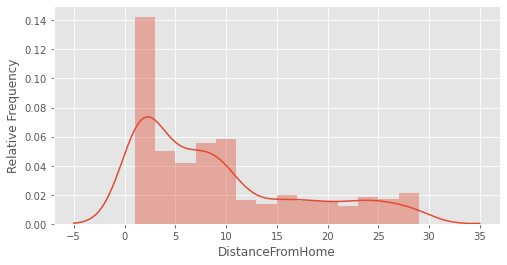

Mean:  9.19251700680272
Median:  7.0

---------- Education ----------


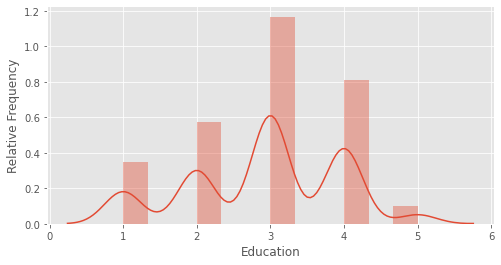

Mean:  2.912925170068027
Median:  3.0

---------- EmployeeCount ----------


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


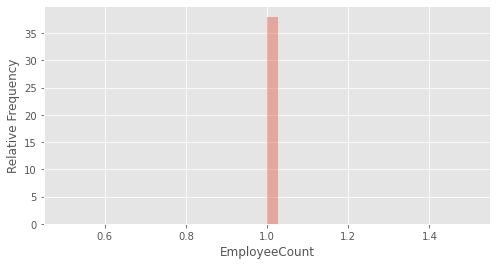

Mean:  1.0
Median:  1.0

---------- EmployeeNumber ----------


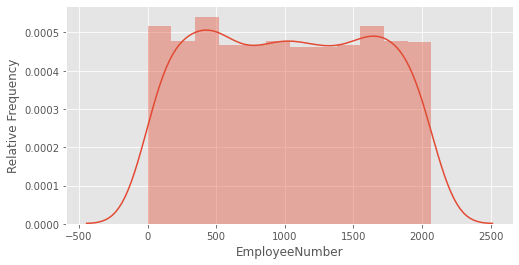

Mean:  1024.865306122449
Median:  1020.5

---------- EnvironmentSatisfaction ----------


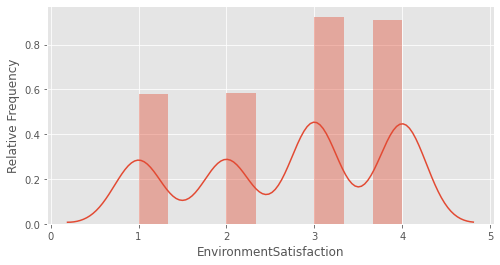

Mean:  2.721768707482993
Median:  3.0

---------- HourlyRate ----------


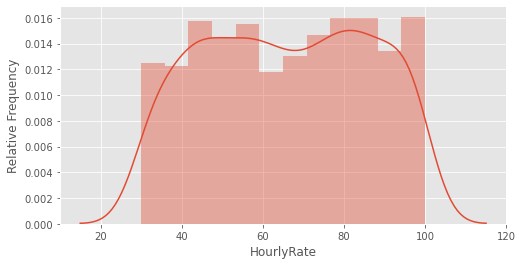

Mean:  65.89115646258503
Median:  66.0

---------- JobInvolvement ----------


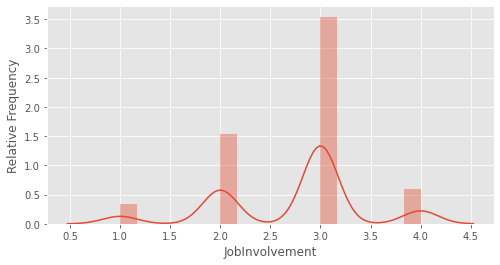

Mean:  2.7299319727891156
Median:  3.0

---------- JobLevel ----------


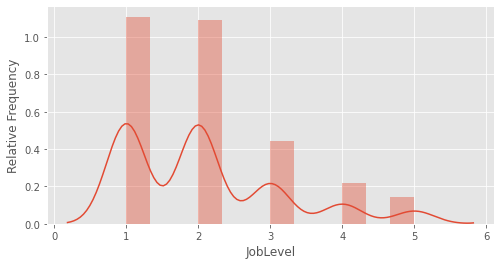

Mean:  2.0639455782312925
Median:  2.0

---------- JobSatisfaction ----------


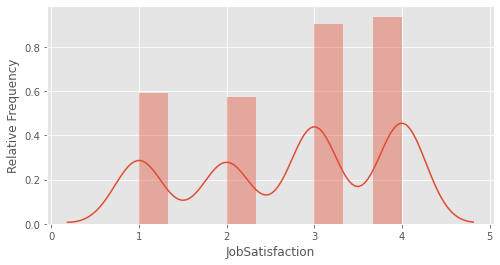

Mean:  2.7285714285714286
Median:  3.0

---------- MonthlyIncome ----------


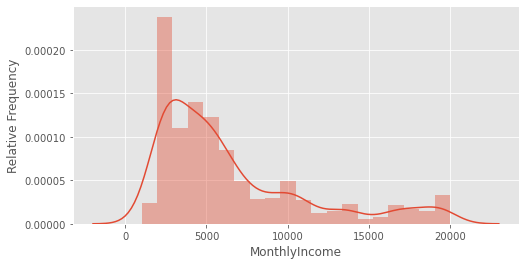

Mean:  6502.931292517007
Median:  4919.0

---------- MonthlyRate ----------


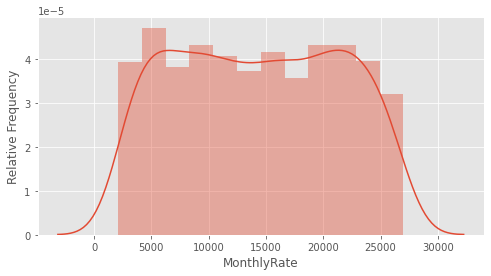

Mean:  14313.103401360544
Median:  14235.5

---------- NumCompaniesWorked ----------


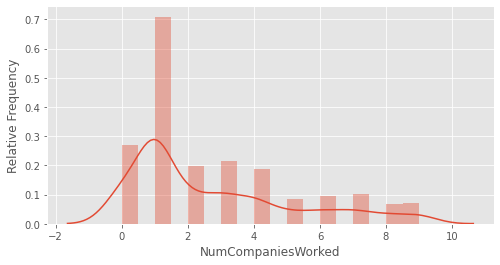

Mean:  2.6931972789115646
Median:  2.0

---------- PercentSalaryHike ----------


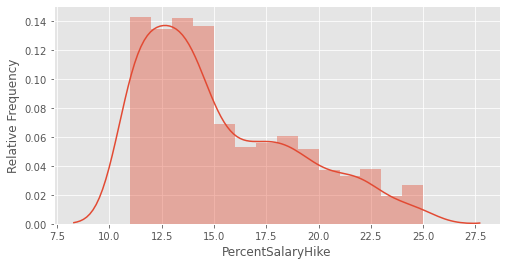

Mean:  15.209523809523809
Median:  14.0

---------- PerformanceRating ----------


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


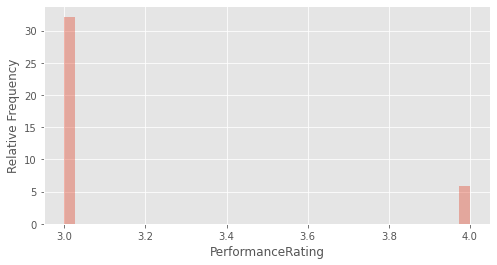

Mean:  3.1537414965986397
Median:  3.0

---------- RelationshipSatisfaction ----------


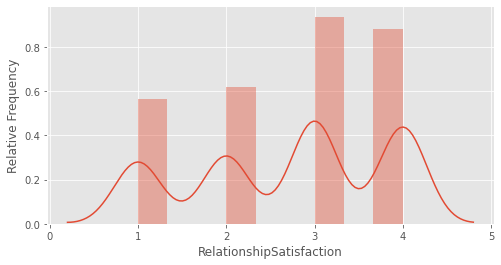

Mean:  2.7122448979591836
Median:  3.0

---------- StandardHours ----------


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


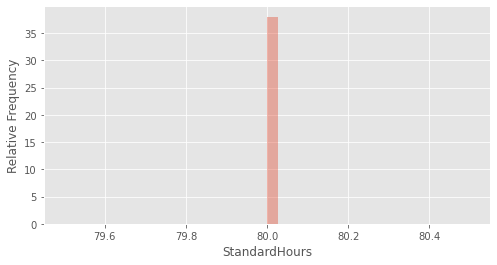

Mean:  80.0
Median:  80.0

---------- StockOptionLevel ----------


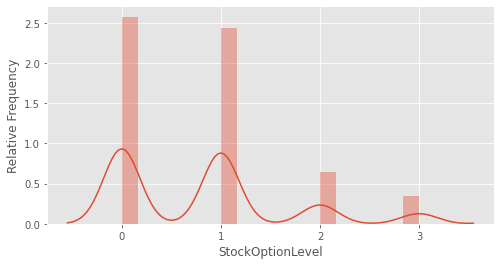

Mean:  0.7938775510204081
Median:  1.0

---------- TotalWorkingYears ----------


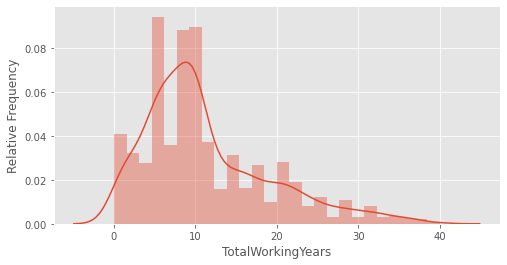

Mean:  11.279591836734694
Median:  10.0

---------- TrainingTimesLastYear ----------


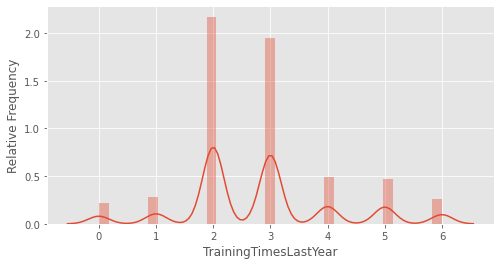

Mean:  2.7993197278911564
Median:  3.0

---------- WorkLifeBalance ----------


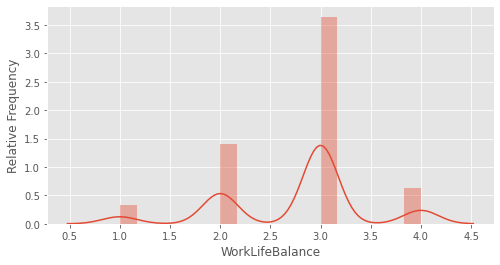

Mean:  2.7612244897959184
Median:  3.0

---------- YearsAtCompany ----------


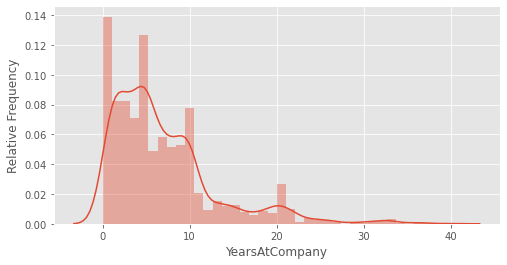

Mean:  7.0081632653061225
Median:  5.0

---------- YearsInCurrentRole ----------


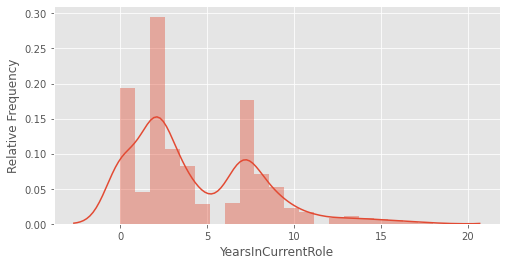

Mean:  4.229251700680272
Median:  3.0

---------- YearsSinceLastPromotion ----------


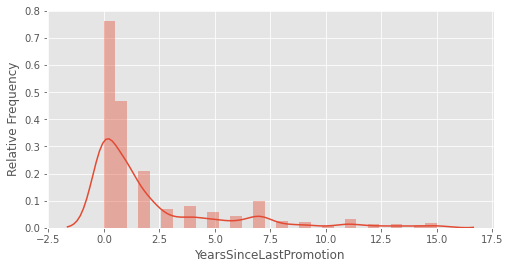

Mean:  2.1877551020408164
Median:  1.0

---------- YearsWithCurrManager ----------


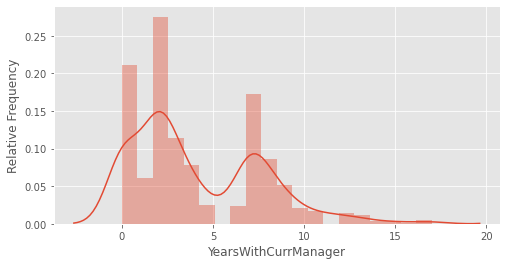

Mean:  4.12312925170068
Median:  3.0



In [56]:
for i in df.describe().columns:
    print("----------",i,"----------")
    plt.figure(figsize=(8, 4))
    sns.distplot(df[i])
    plt.ylabel("Relative Frequency")
    plt.show()
    print("Mean: ", df[i].mean())
    print("Median: ", df[i].median())
    print("")

Insights from Continuous Predictors:
* Most employees are around 36-37 years of age.
* The daily rate follows almost a uniform uniform distribution with mean 802
* Most people travel around 7 km from home but as there are quite a bit of employees traveling far distances, it brings the mean to 9 km. It s highly right-skewed.
* Education is discrete and mean years of experience is 3 years.
* Employee Number seems to be more of a uniform distribution with general count of employees being 1020
* On a 4 point scale generally satisfaction level is 3-4
* Hourly Rate follows a uniform distribution with average hourly rate being 66
* Job Involvement generally seems to be 3 on a 4 point scale which is above average. Most people are involved in their job.
* Job Level is discrete and most people seem to be at 1,2 job levels (they are probably employee who work at lower level roles)
* Job Satisfaction seems seems relatively high with 3-4 being most common on a 4 point scale.
*  General monthly income seems to be around 5000, but considering that there are employees are higher job roles the average income is 6500 rupees.
* Monthly rate also shows a uniform distribution with general figure being 14313.
* Most people have 1 year of work experience. The data being discrete.
* Percentage hike shows a right-skewed distribution, which basically means that most employees get a salary hike of 14% on their previous salary but since the data is highly right-skewed there are quite a few employees getting much higher salary hikes making the average salary hike 15%.
* Most employee have a 3.0 performance rating.
* relationship satisfaction is between 3-4 for most employees on a 4 point scale.
* Standard hours is 80 hrs.
* Stock options of most employees is 0 or 1.
* Most people have total working experience of 11 years, considering the data is right-skewed.
* Training Times Last Year is mostly 2-3.
* Most employees have an above average work life balance (3 out of 4)
* Most employees have around 7 years working in the company. 
* Employees have 3-4 years work experience in a current role before they decide to switch. Data is right-skewed.
* Most employees get a promotion in 1-2 years time.
* Most employees have 3-4 years working with their current manager.

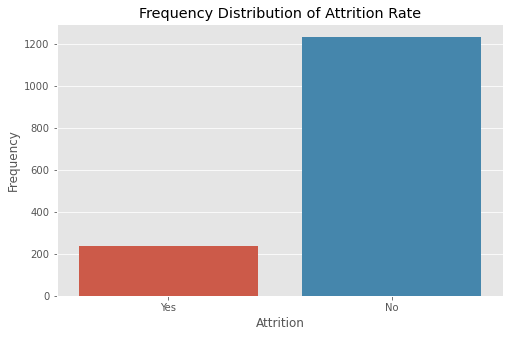

In [57]:
# target variable: Attrition

plt.figure(figsize=(8, 5))
sns.countplot(df["Attrition"])
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Attrition Rate")
plt.show()

Observations:
* We see that the target variable, Attrition has majority of values of 0 (No Attrition)
* Which means that the class is imbalanced. 
* We need to balance it using class weights / Upsampling: SMOTE, so that we can train our model properly on the target labels so that the model can effetively predict the target labels .

### Ordinal

In [58]:
# We will use replace() rather than LabelEncoder() to handle Ordinal data as we will have more control on the data.
df["BusinessTravel"].replace(to_replace=["Non-Travel", "Travel_Rarely", "Travel_Frequently"], value=[0,1,2], inplace=True)

In [59]:
df["BusinessTravel"].value_counts()

1    1043
2     277
0     150
Name: BusinessTravel, dtype: int64

### Nominal

In [60]:
# We can use the replace() to convert "Y" to 1 in Over18 and for OverTime
df["Over18"].replace({"Y":1}, inplace=True)

In [61]:
df["Over18"].value_counts()

1    1470
Name: Over18, dtype: int64

In [62]:
df["OverTime"].replace({"No":0, "Yes":1}, inplace=True)

In [63]:
df["OverTime"].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [64]:
df["Attrition"].replace({"Yes":1, "No":0}, inplace=True)

In [65]:
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [66]:
df["Gender"].replace({"Male":0, "Female":1}, inplace=True)

In [67]:
df["Gender"].value_counts()

0    882
1    588
Name: Gender, dtype: int64

In [68]:
# We are left with Department, EducationField and JobRole, MaritalStatus
# These Nominal Features have multiple levels, so we will use One Hot Encoding to handle them.
# We use drop_first=true to avoid curse of dimensionality.

In [69]:
df1 = pd.get_dummies(data=df, columns=["Department", "EducationField", "MaritalStatus", "JobRole"], drop_first=True)
df1.head(10)

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41          1               1       1102                 1          2   
1   49          0               2        279                 8          1   
2   37          1               1       1373                 2          2   
3   33          0               2       1392                 3          4   
4   27          0               1        591                 2          1   
5   32          0               2       1005                 2          2   
6   59          0               1       1324                 3          3   
7   30          0               1       1358                24          1   
8   38          0               2        216                23          3   
9   36          0               1       1299                27          3   

   EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0              1               1                        2       1          94   
1              1               2                        3       0          61   
2              1               4                        4       0          92   
3              1               5                        4       1          56   
4              1               7                        1       0          40   
5              1               8                        4       0          79   
6              1              10                        3       1          81   
7              1              11                        4       0          67   
8              1              12                        4       0          44   
9              1              13                        3       0          94   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0               3         2                4           5993        19479   
1               2         2                2           5130        24907   
2               2         1                3           2090         2396   
3               3         1                3           2909        23159   
4               3         1                2           3468        16632   
5               3         1                4           3068        11864   
6               4         1                1           2670         9964   
7               3         1                3           2693        13335   
8               2         3                3           9526         8787   
9               3         2                3           5237        16577   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8       1         1                 11                  3   
1                   1       1         0                 23                  4   
2                   6       1         1                 15                  3   
3                   1       1         1                 11                  3   
4                   9       1         0                 12                  3   
5                   0       1         0                 13                  3   
6                   4       1         1                 20                  4   
7                   1       1         0                 22                  4   
8                   0       1         0                 21                  4   
9                   6       1         0                 13                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   
5                         3             80                 0   
6                         1             80                 3   
7                     

# Multi-Variate Analysis

In [70]:
# correlation between variables of type "int64" or "float64"
corr = df1.corr()
corr

Age  Attrition  BusinessTravel  \
Age                                1.000000  -0.159205       -0.011807   
Attrition                         -0.159205   1.000000        0.127006   
BusinessTravel                    -0.011807   0.127006        1.000000   
DailyRate                          0.010661  -0.056652       -0.015539   
DistanceFromHome                  -0.001686   0.077924       -0.009696   
Education                          0.208034  -0.031373       -0.008670   
EmployeeCount                           NaN        NaN             NaN   
EmployeeNumber                    -0.010145  -0.010577       -0.018538   
EnvironmentSatisfaction            0.010146  -0.103369       -0.011310   
Gender                             0.036311  -0.029453        0.044896   
HourlyRate                         0.024287  -0.006846       -0.004164   
JobInvolvement                     0.029820  -0.130016        0.029300   
JobLevel                           0.509604  -0.169105       -0.011696   
JobSatisfaction                   -0.004892  -0.103481        0.008666   
MonthlyIncome                      0.497855  -0.159840       -0.013450   
MonthlyRate                        0.028051   0.015170       -0.008440   
NumCompaniesWorked                 0.299635   0.043494       -0.030743   
Over18                                  NaN        NaN             NaN   
OverTime                           0.028062   0.246118        0.042752   
PercentSalaryHike                  0.003634  -0.013478       -0.025727   
PerformanceRating                  0.001904   0.002889        0.001683   
RelationshipSatisfaction           0.053535  -0.045872        0.008926   
StandardHours                           NaN        NaN             NaN   
StockOptionLevel                   0.037510  -0.137145       -0.028257   
TotalWorkingYears                  0.680381  -0.171063        0.007972   
TrainingTimesLastYear             -0.019621  -0.059478        0.016357   
WorkLifeBalance                   -0.021490  -0.063939        0.004209   
YearsAtCompany                     0.311309  -0.134392        0.005212   
YearsInCurrentRole                 0.212901  -0.160545       -0.005336   
YearsSinceLastPromotion            0.216513  -0.033019        0.005222   
YearsWithCurrManager               0.202089  -0.156199       -0.000229   
Department_Research & Development  0.017883  -0.085293        0.005308   
Department_Sales                  -0.027549   0.080855       -0.004261   
EducationField_Life Sciences       0.016824  -0.032703        0.019860   
EducationField_Marketing           0.038162   0.055781        0.005201   
EducationField_Medical            -0.006354  -0.046999       -0.011245   
EducationField_Other              -0.041466  -0.017898       -0.000470   
EducationField_Technical Degree   -0.027604   0.069355       -0.019699   
MaritalStatus_Married              0.083919  -0.090984        0.002198   
MaritalStatus_Single              -0.119185   0.175419        0.023017   
JobRole_Human Resources           -0.029856   0.036215        0.010435   
JobRole_Laboratory Technician     -0.143176   0.098290        0.002094   
JobRole_Manager                    0.294248  -0.083316       -0.039312   
JobRole_Manufacturing Director     0.049726  -0.082994        0.014893   
JobRole_Research Director          0.185891  -0.088870       -0.005138   
JobRole_Research Scientist        -0.146518  -0.000360        0.002477   
JobRole_Sales Executive           -0.002001   0.019774       -0.025131   
JobRole_Sales Representative      -0.175785   0.157234        0.059995   

                                   DailyRate  DistanceFromHome  Education  \
Age                                 0.010661         -0.001686   0.208034   
Attrition                          -0.056652          0.077924  -0.031373   
BusinessTravel                     -0.015539         -0.009696  -0.008670   
DailyRate                           1.000000         -0.004985  -0.016806   
DistanceFromHome            

In [71]:
# np.zeros_like() returns an array of zeros with the same shape and type as the given array. By passing in the correlation matrix, we get an array of zeros
# The dtype=np.bool parameter overrides the data type, so our array is an array of booleans.
mask = np.zeros_like(corr, dtype=np.bool)
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [72]:
# np.triu_indices_from(mask) returns the indices for the upper triangle of the array.
# we set the upper values of the triangle to True
mask[np.triu_indices_from(mask)]= True
mask[np.triu_indices_from(mask)]

array([ True,  True,  True, ...,  True,  True,  True])

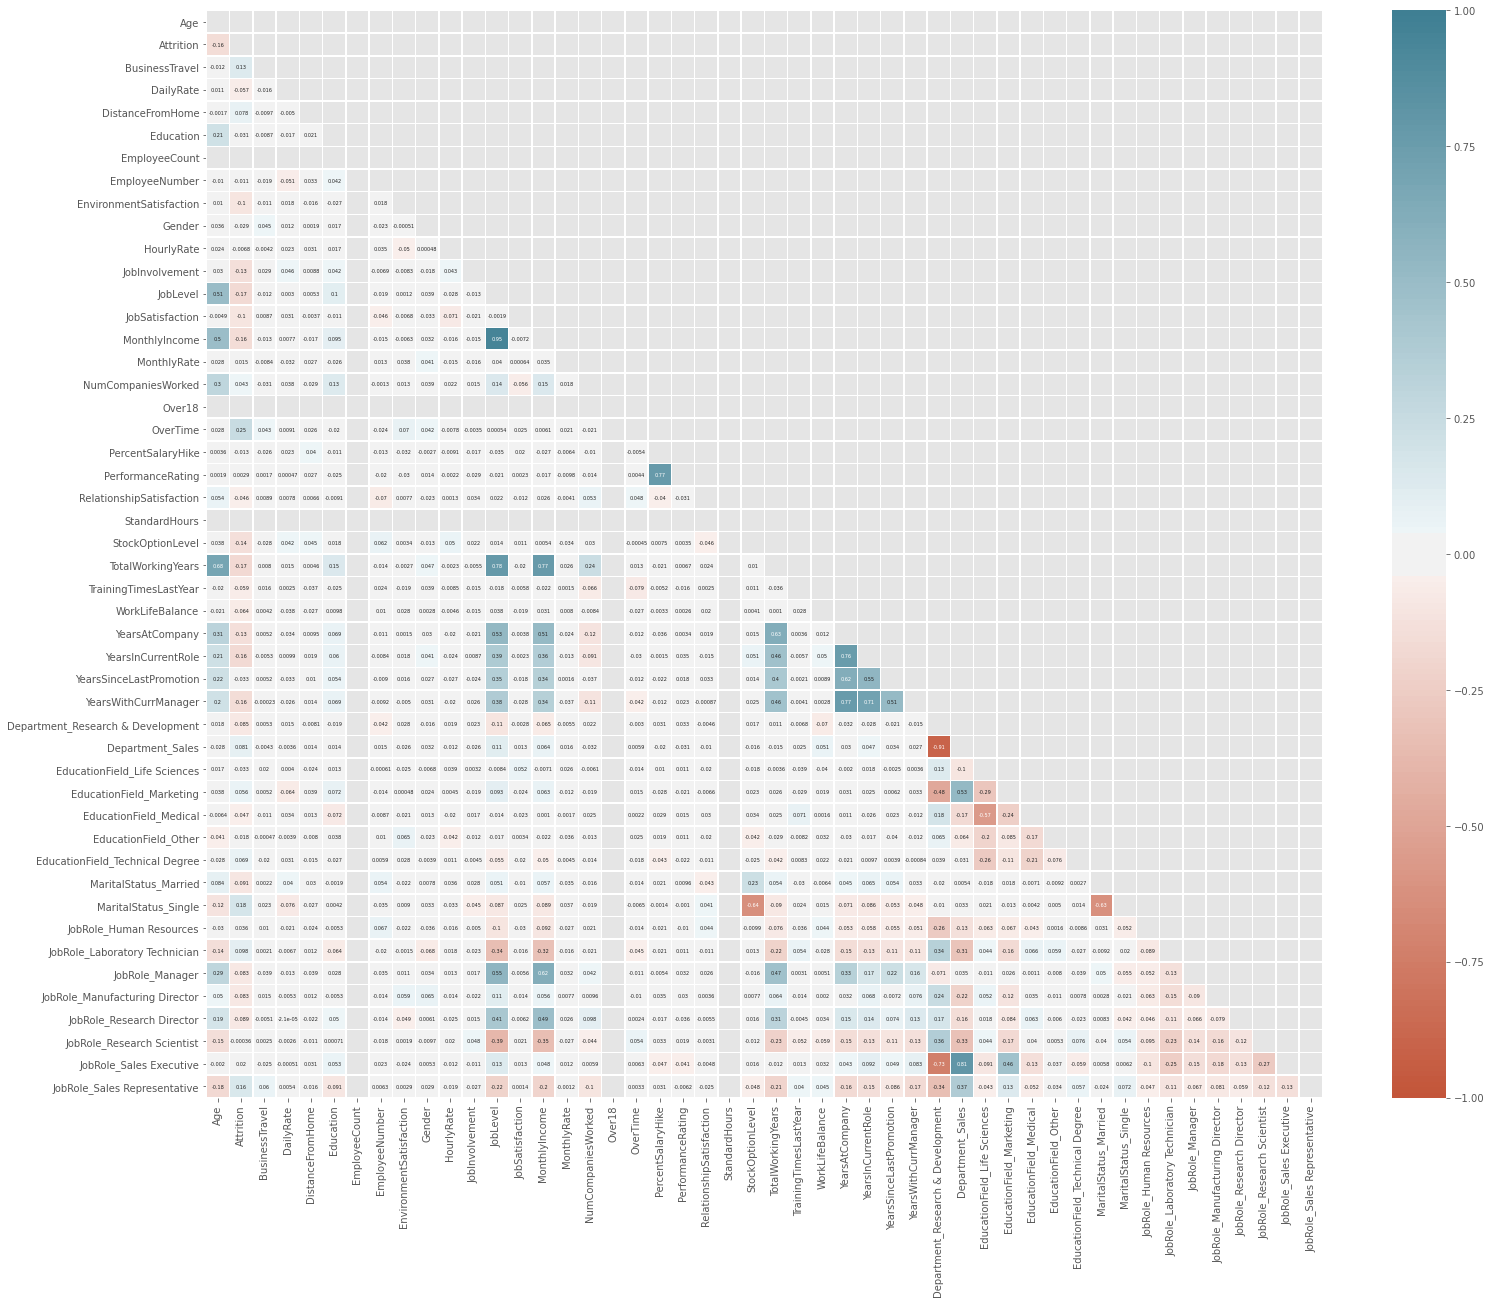

In [73]:
plt.figure(figsize=(25,20))
ax = sns.heatmap(corr,
                      mask = mask,
                      #square = True,
                      linewidths = .5,
                      #cmap = 'coolwarm',
                      cmap=sns.diverging_palette(20, 220, n=200),
                      #cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 5})
ax.set_xticklabels(ax.get_xticklabels());
ax.set_yticklabels(ax.get_yticklabels());

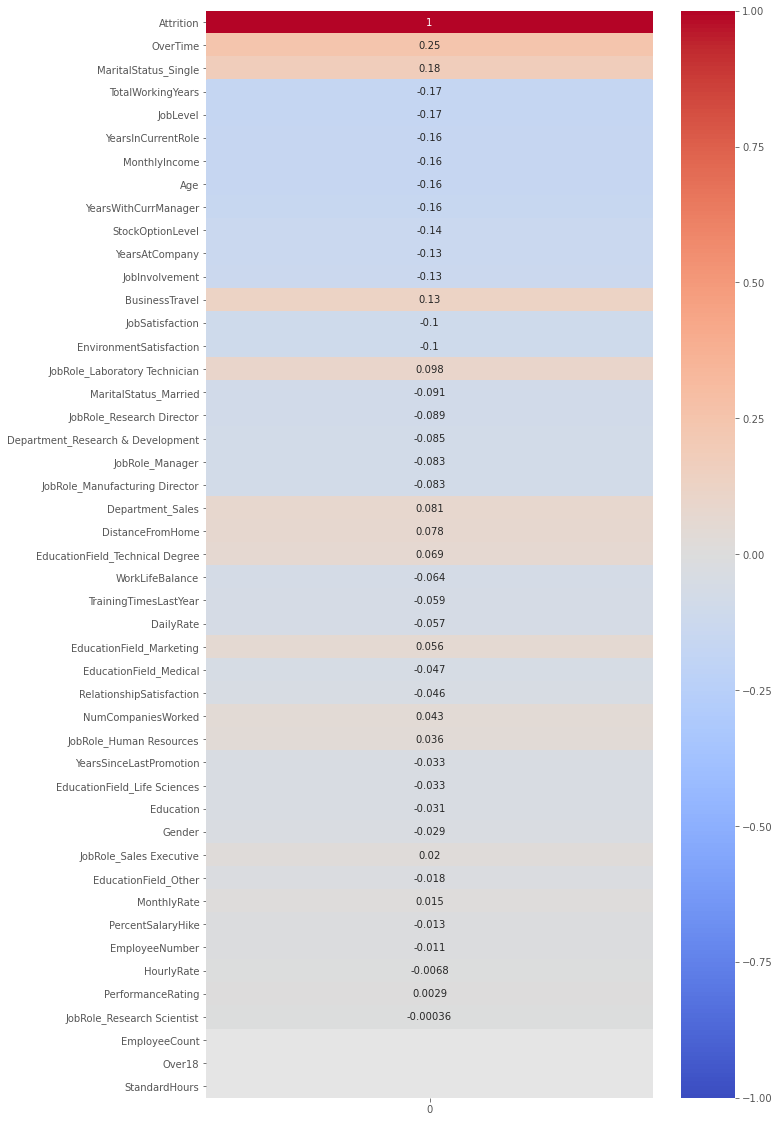

In [74]:
correlations = df1.corrwith(df1['Attrition']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()    # return absolute value of a number
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [75]:
# We see that none of the predictors show strong correlation with the target variable (attrition).

# Outliers

-------------------- Age --------------------


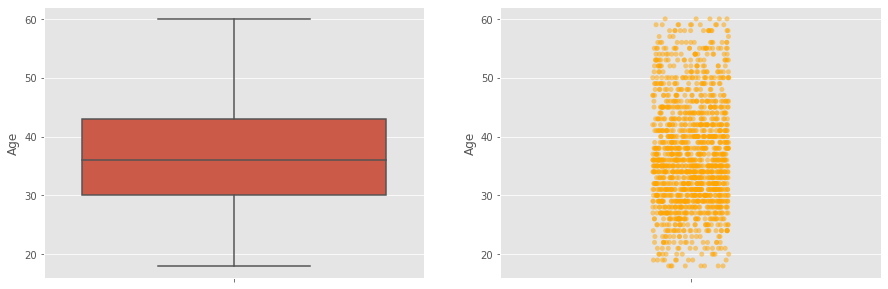


-------------------- Attrition --------------------


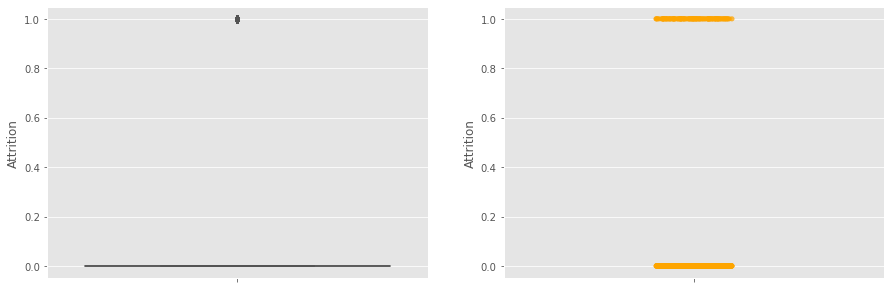


-------------------- BusinessTravel --------------------


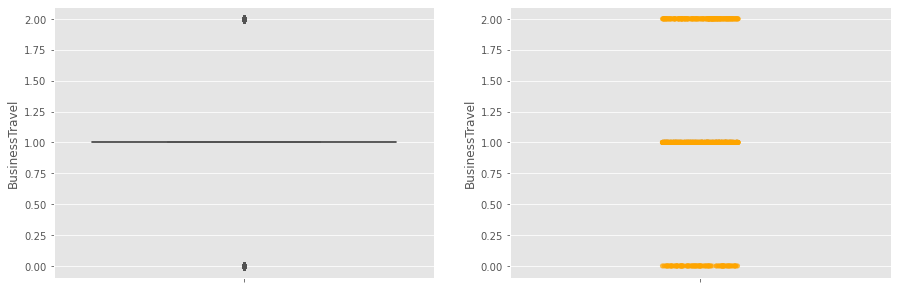


-------------------- DailyRate --------------------


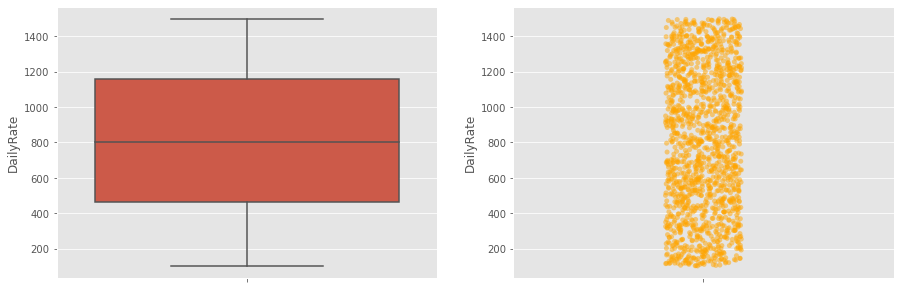


-------------------- DistanceFromHome --------------------


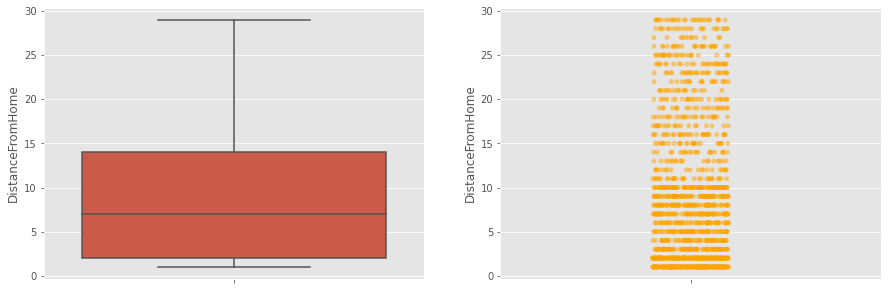


-------------------- Education --------------------


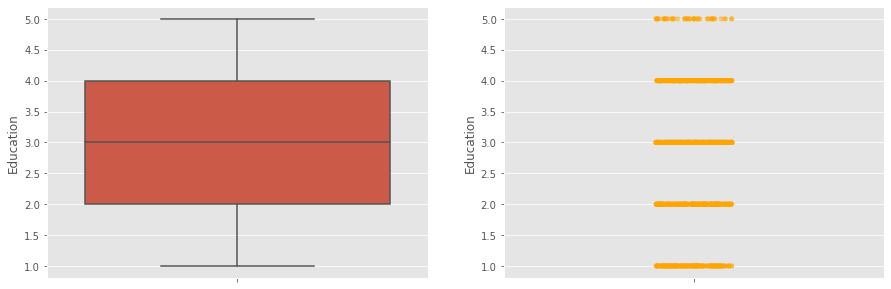


-------------------- EmployeeCount --------------------


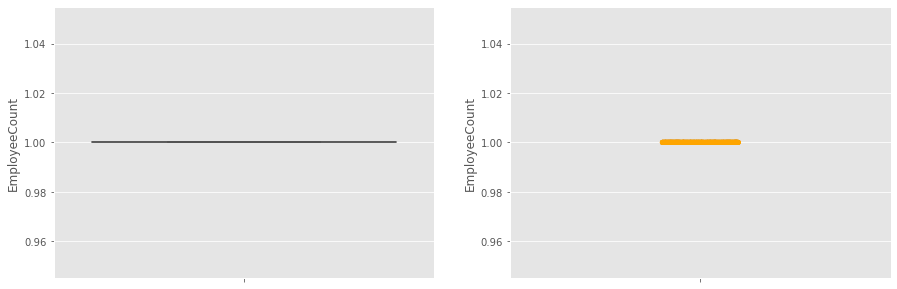


-------------------- EmployeeNumber --------------------


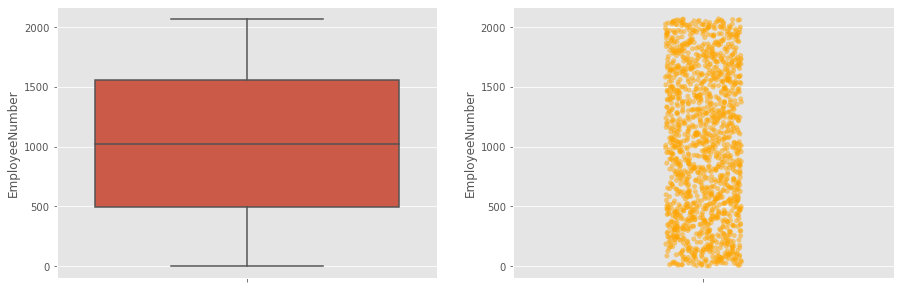


-------------------- EnvironmentSatisfaction --------------------


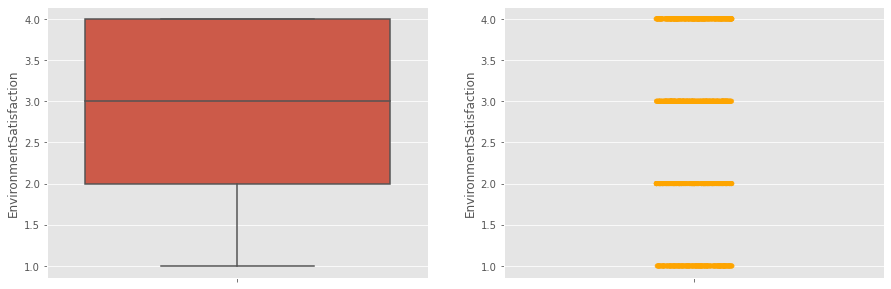


-------------------- Gender --------------------


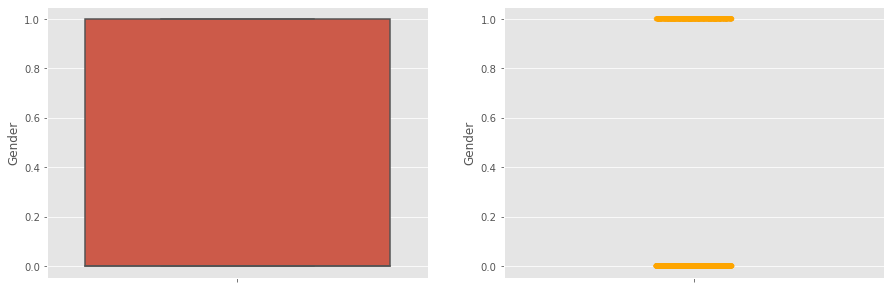


-------------------- HourlyRate --------------------


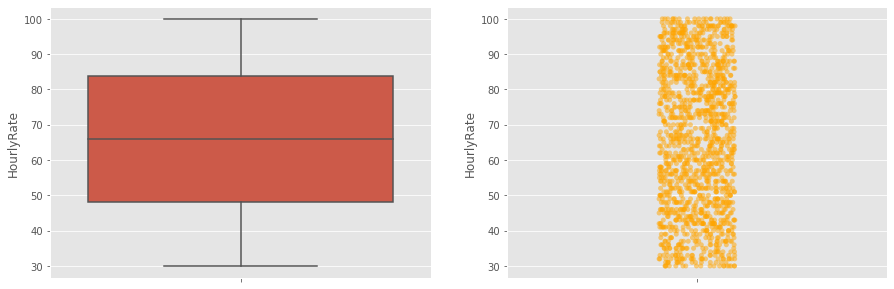


-------------------- JobInvolvement --------------------


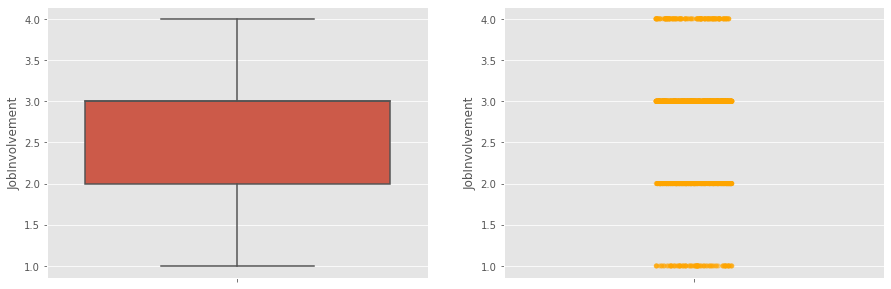


-------------------- JobLevel --------------------


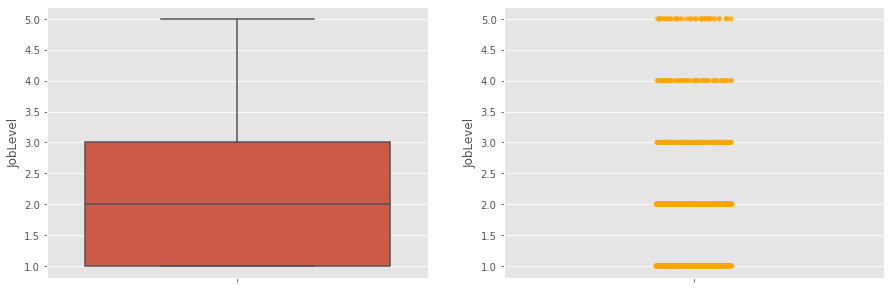


-------------------- JobSatisfaction --------------------


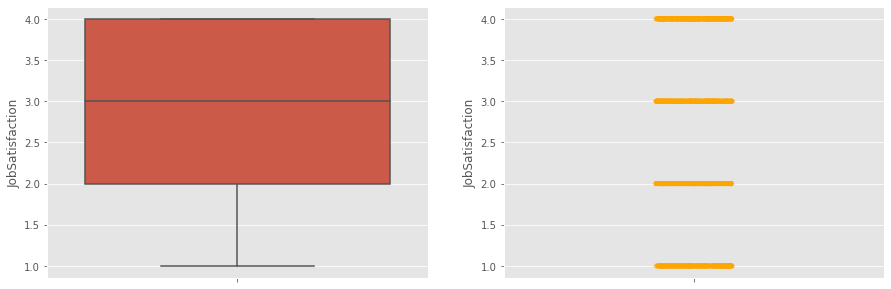


-------------------- MonthlyIncome --------------------


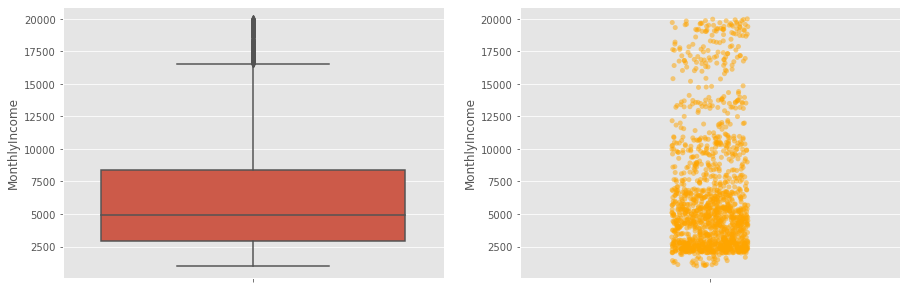


-------------------- MonthlyRate --------------------


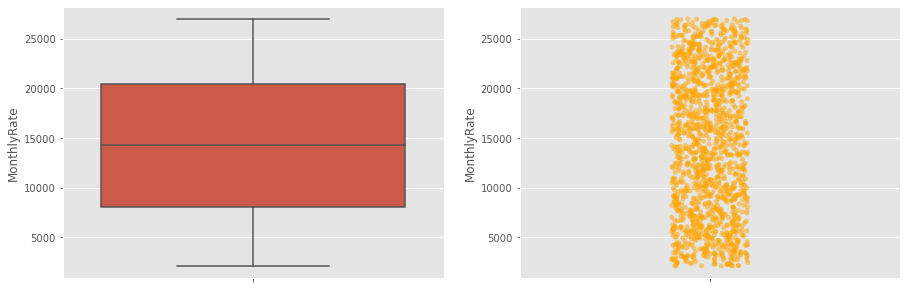


-------------------- NumCompaniesWorked --------------------


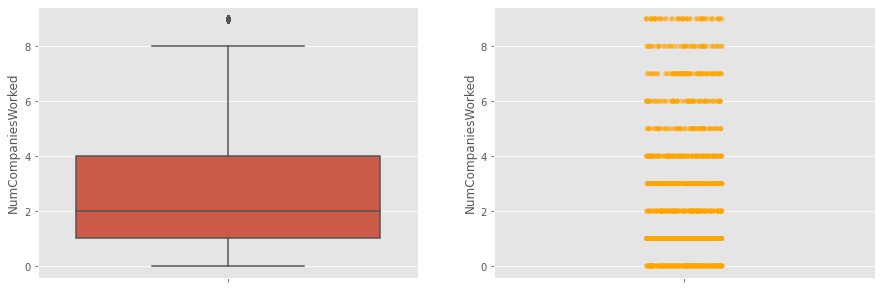


-------------------- Over18 --------------------


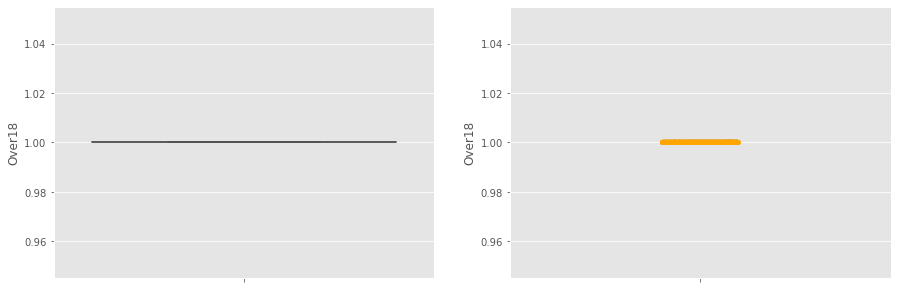


-------------------- OverTime --------------------


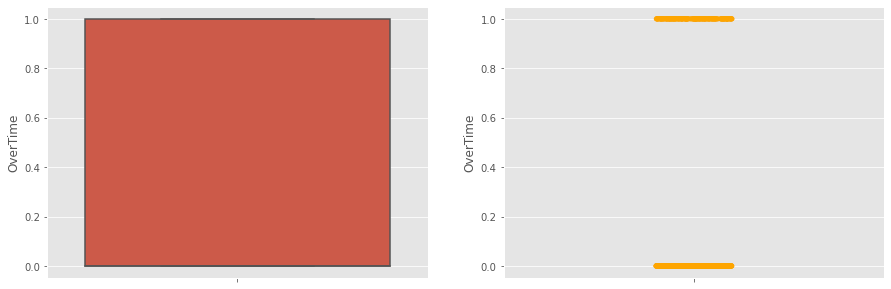


-------------------- PercentSalaryHike --------------------


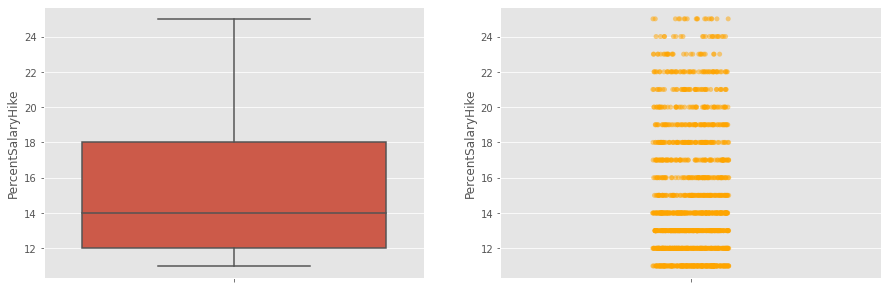


-------------------- PerformanceRating --------------------


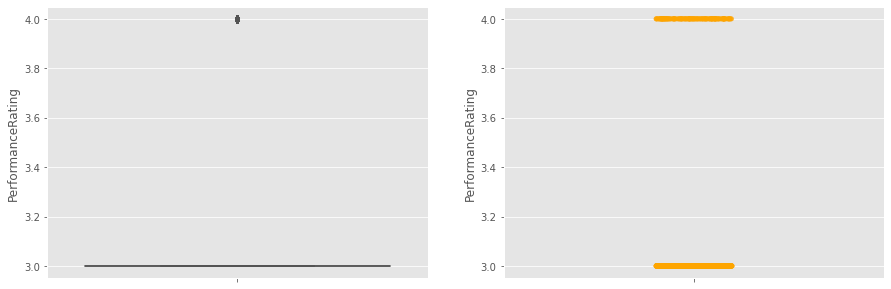


-------------------- RelationshipSatisfaction --------------------


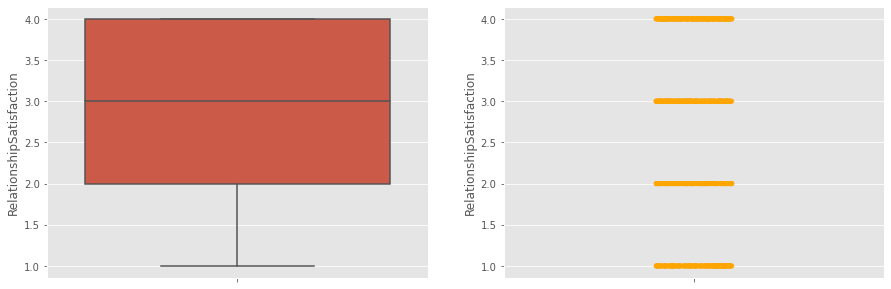


-------------------- StandardHours --------------------


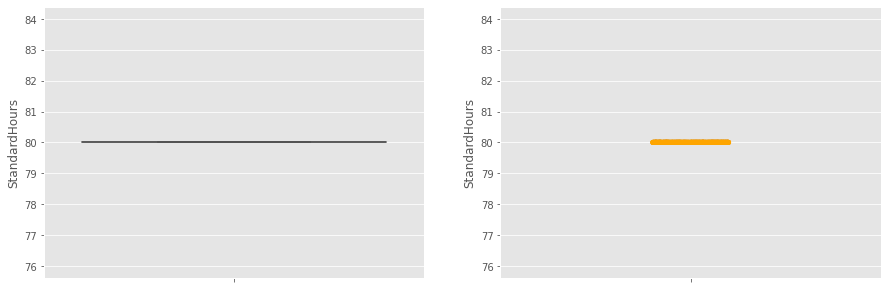


-------------------- StockOptionLevel --------------------


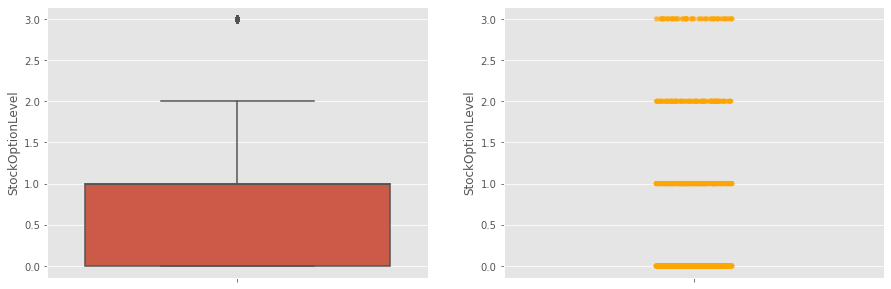


-------------------- TotalWorkingYears --------------------


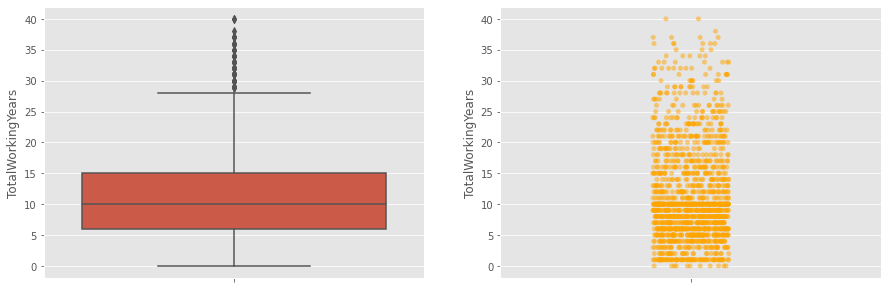


-------------------- TrainingTimesLastYear --------------------


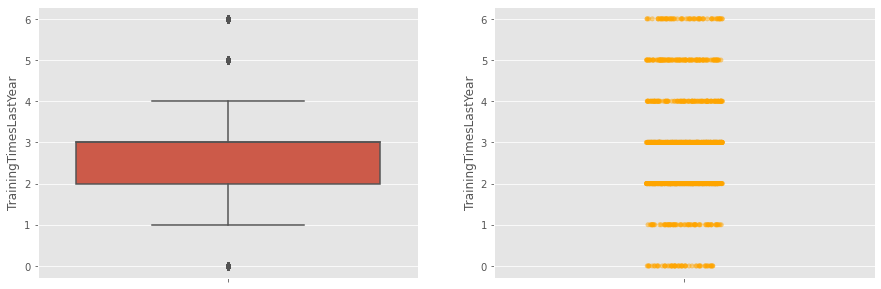


-------------------- WorkLifeBalance --------------------


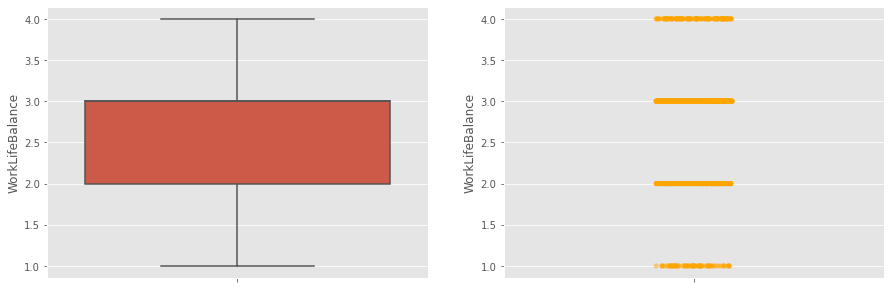


-------------------- YearsAtCompany --------------------


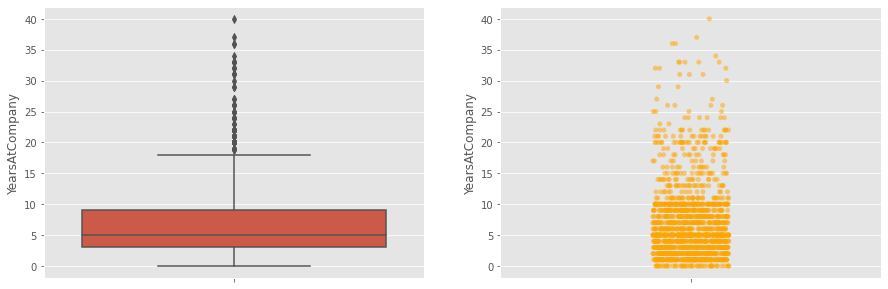


-------------------- YearsInCurrentRole --------------------


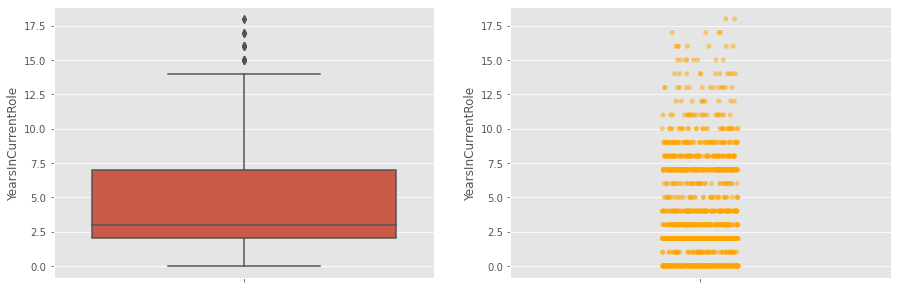


-------------------- YearsSinceLastPromotion --------------------


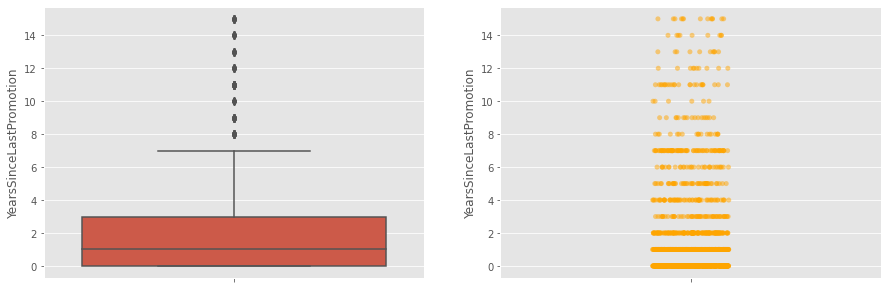


-------------------- YearsWithCurrManager --------------------


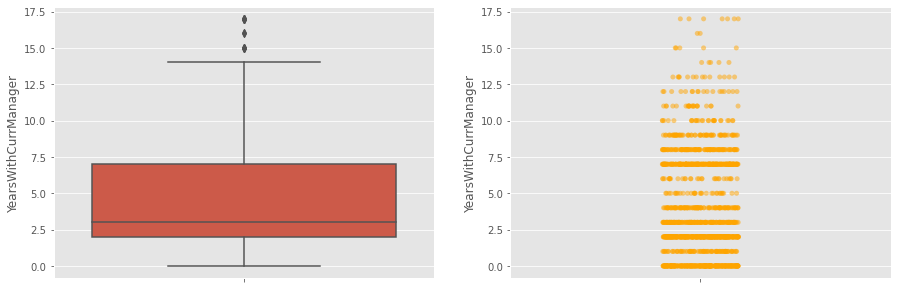


-------------------- Department_Research & Development --------------------


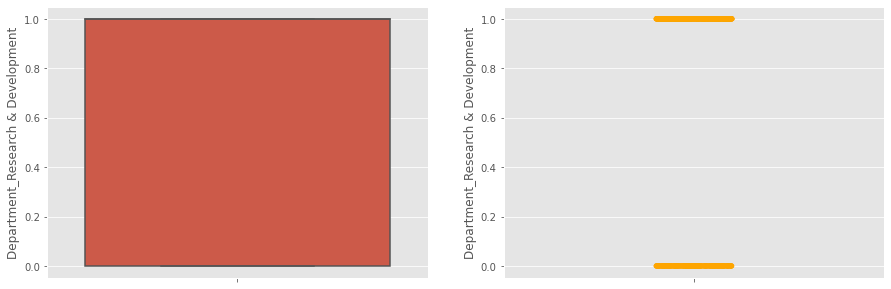


-------------------- Department_Sales --------------------


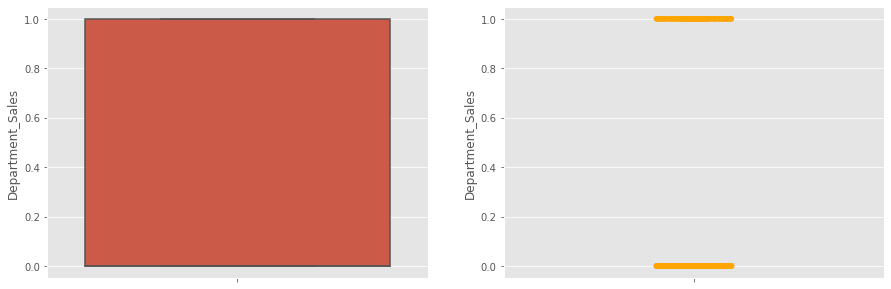


-------------------- EducationField_Life Sciences --------------------


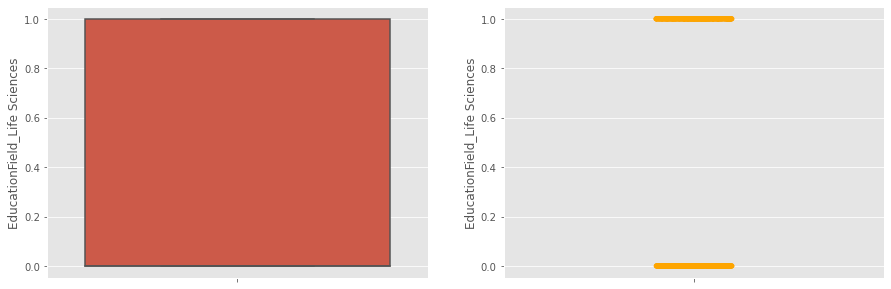


-------------------- EducationField_Marketing --------------------


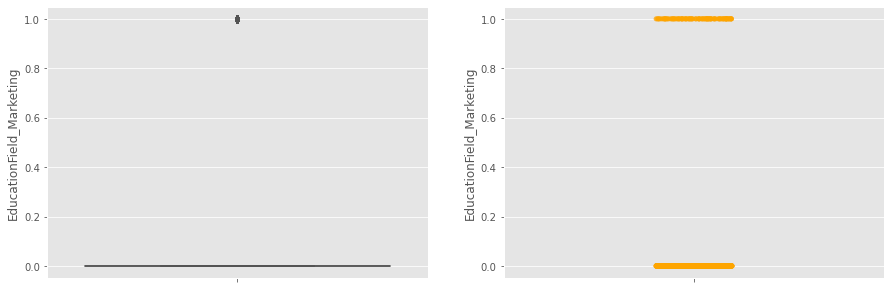


-------------------- EducationField_Medical --------------------


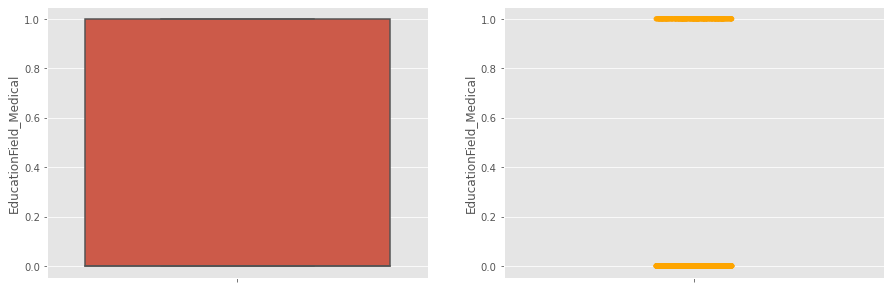


-------------------- EducationField_Other --------------------


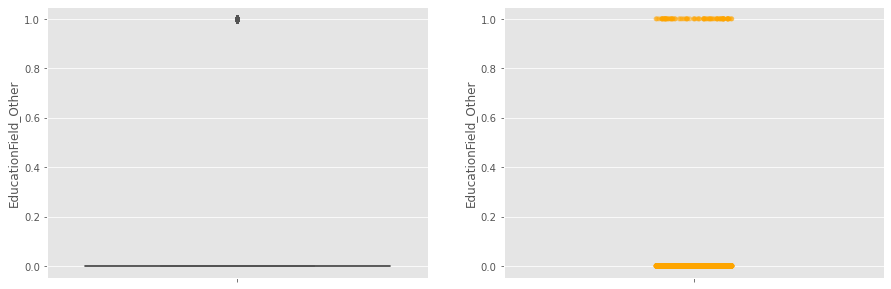


-------------------- EducationField_Technical Degree --------------------


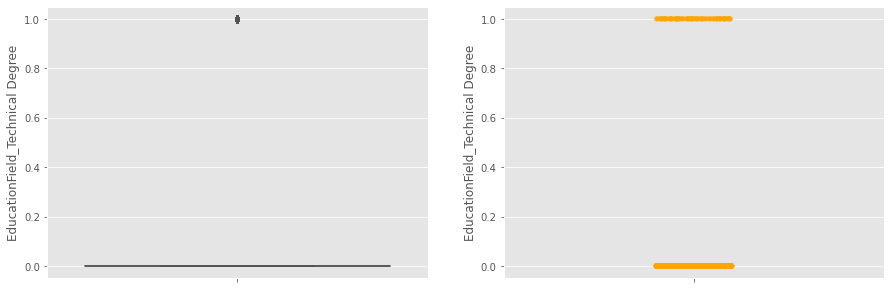


-------------------- MaritalStatus_Married --------------------


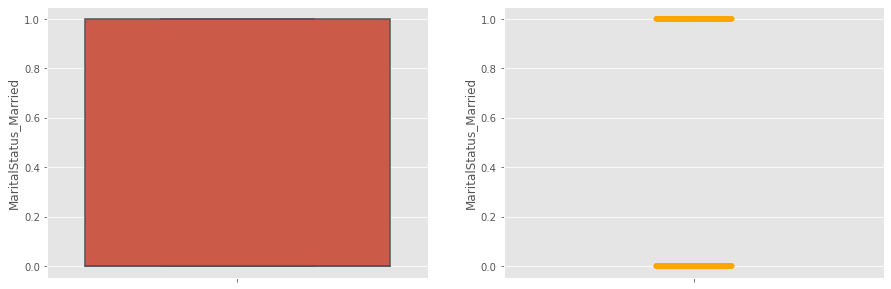


-------------------- MaritalStatus_Single --------------------


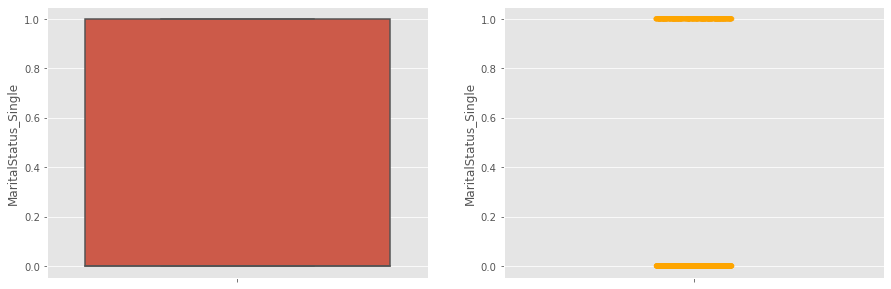


-------------------- JobRole_Human Resources --------------------


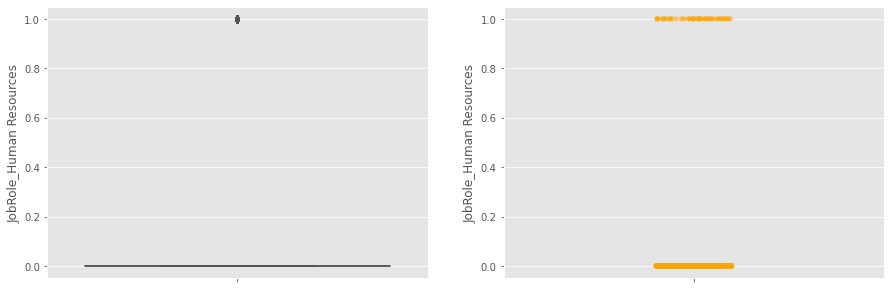


-------------------- JobRole_Laboratory Technician --------------------


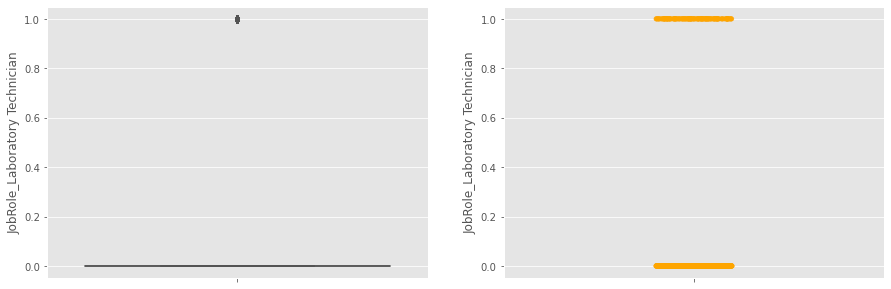


-------------------- JobRole_Manager --------------------


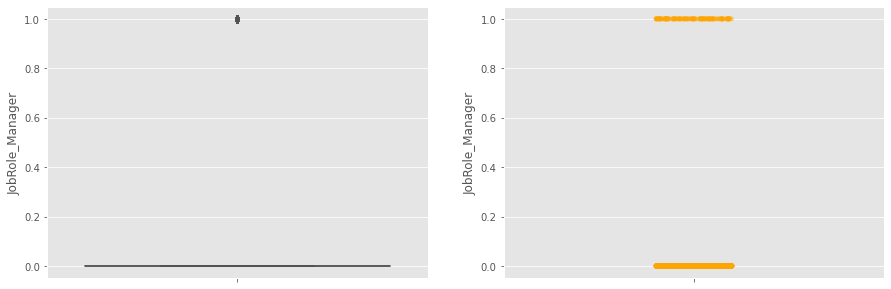


-------------------- JobRole_Manufacturing Director --------------------


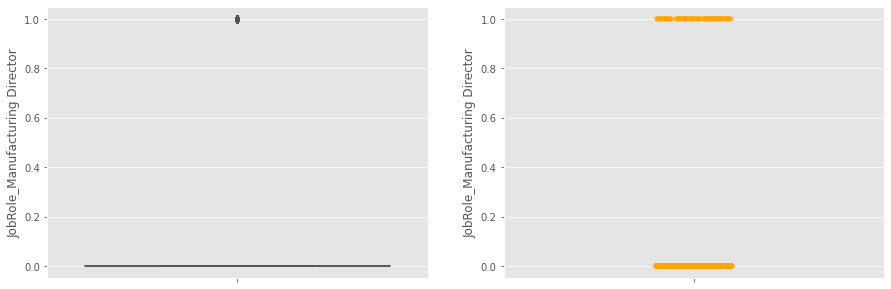


-------------------- JobRole_Research Director --------------------


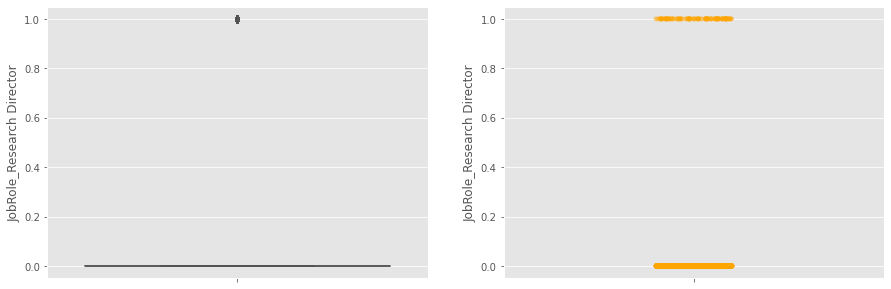


-------------------- JobRole_Research Scientist --------------------


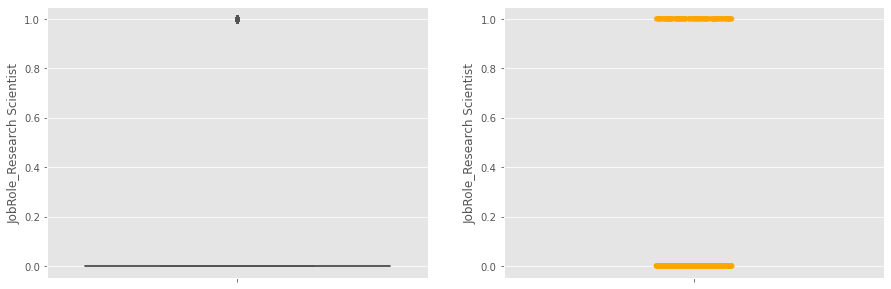


-------------------- JobRole_Sales Executive --------------------


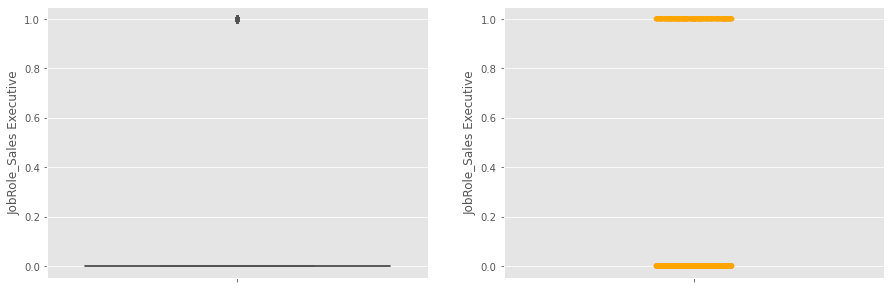


-------------------- JobRole_Sales Representative --------------------


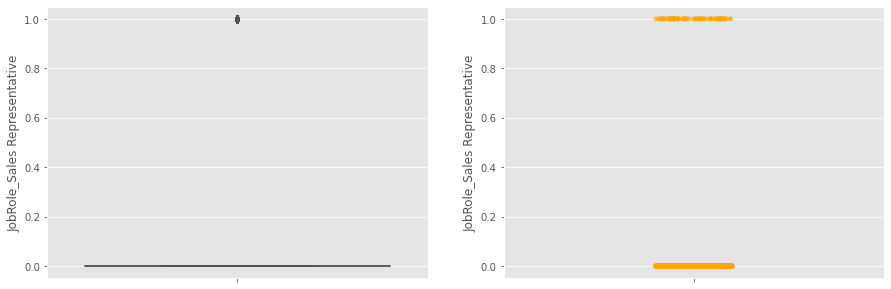

In [76]:
# show 2 graphs at the same time using subplots

for column in df1.corr().columns:
    print("--------------------",column,"--------------------")
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    sns.boxplot(y=column, data=df1, ax=axes[0])
    sns.stripplot(y=column, data=df1, jitter=True, dodge=True, marker='o', alpha=0.5, color="orange", ax=axes[1])
    plt.show()
    print("")

In [77]:
df_i = df1.copy()
df_i.head()

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41          1               1       1102                 1          2   
1   49          0               2        279                 8          1   
2   37          1               1       1373                 2          2   
3   33          0               2       1392                 3          4   
4   27          0               1        591                 2          1   

   EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0              1               1                        2       1          94   
1              1               2                        3       0          61   
2              1               4                        4       0          92   
3              1               5                        4       1          56   
4              1               7                        1       0          40   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0               3         2                4           5993        19479   
1               2         2                2           5130        24907   
2               2         1                3           2090         2396   
3               3         1                3           2909        23159   
4               3         1                2           3468        16632   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8       1         1                 11                  3   
1                   1       1         0                 23                  4   
2                   6       1         1                 15                  3   
3                   1       1         1                 11                  3   
4                   9       1         0                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4                        0                     5   
1                   7                        1                     7   
2                   0                        0                     0   
3                   7                        3                     0   
4                   2                        2                     2   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                  

In [78]:
df_i.shape

(1470, 48)

In [79]:
# Inter-Quartile range for each column
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
print(IQR)

Age                                     13.00
Attrition                                0.00
BusinessTravel                           0.00
DailyRate                              692.00
DistanceFromHome                        12.00
Education                                2.00
EmployeeCount                            0.00
EmployeeNumber                        1064.50
EnvironmentSatisfaction                  2.00
Gender                                   1.00
HourlyRate                              35.75
JobInvolvement                           1.00
JobLevel                                 2.00
JobSatisfaction                          2.00
MonthlyIncome                         5468.00
MonthlyRate                          12414.50
NumCompaniesWorked                       3.00
Over18                                   0.00
OverTime                                 1.00
PercentSalaryHike                        6.00
PerformanceRating                        0.00
RelationshipSatisfaction          

In [80]:
# The columns having non 0, 1 columns are the continuous columns which need to be considered for outlier detection.

In [81]:
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
df_i = df_i[~((df_i < lower_range) | (df_i > upper_range)).any(axis=1)]
df_i.head()

Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
9     36          0               1       1299                27          3   
163   57          0               1        334                24          2   
209   46          0               1        644                 1          4   
302   28          0               1       1476                16          2   
333   43          0               1       1001                 7          3   

     EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  \
9                1              13                        3       0   
163              1             223                        3       0   
209              1             288                        4       0   
302              1             412                        2       0   
333              1             451                        3       1   

     HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
9            94               3         2                3           5237   
163          83               4         3                4           9439   
209          97               3         3                1           9396   
302          68               4         2                1           5661   
333          43               3         3                1           9985   

     MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  \
9          16577                   6       1         0                 13   
163        23402                   3       1         1                 16   
209        12368                   7       1         0                 16   
302         4824                   0       1         0                 19   
333         9262                   8       1         0                 16   

     PerformanceRating  RelationshipSatisfaction  StandardHours  \
9                    3                         2             80   
163                  3                         2             80   
209                  3                         3             80   
302                  3                         3             80   
333                  3                         1             80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
9                   2                 17                      3   
163                 1                 12                      2   
209                 1                 17                      3   
302                 0                  9                      2   
333                 1                 10                      1   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
9                  2               7                   7   
163                1               5                   3   
209                3               4                   2   
302                3               8                   3   
333                2               1                   0   

     YearsSinceLastPromotion  YearsWithCurrManager  \
9                          7                     7   
163                        1                     4   
209                        0                     3   
302                        0                     7   
333                        0                     0   

     Department_Research & Development  Department_Sales  \
9                                    1                 0   
163                                  1                 0   
209                                  1                 0   
302                                  1                 0   
333                                  1                 0   

     EducationField_Life Sciences  EducationField_Marketing  \
9                               0                         0   
163                             1                         0   
209                             0                         0   
302                             0                         0   
333      

In [82]:
df_i.shape

(41, 48)

In [83]:
# We see that most of our data is removed, hence we wont remove the outliers, as they might be important.

# Sampling (Train and Test)

In [84]:
import scipy.stats as stats
from scipy.stats import zscore
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, binarize, MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, KFold, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve,roc_auc_score, accuracy_score, cohen_kappa_score, jaccard_score, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, classification_report, f1_score
from scipy.stats import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare, f_oneway
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC

from warnings import filterwarnings
filterwarnings('ignore')

In [85]:
X = df1.drop("Attrition", axis=1)
y = df1["Attrition"]

In [86]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()#instantiate
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df1 = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df1.head()

Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0  0.446350       -0.162399   0.742527         -1.010909  -0.891688   
1  1.322365        1.717339  -1.297775         -0.147150  -1.868426   
2  0.008343       -0.162399   1.414363         -0.887515  -0.891688   
3 -0.429664        1.717339   1.461466         -0.764121   1.061787   
4 -1.086676       -0.162399  -0.524295         -0.887515  -1.868426   

   EmployeeCount  EmployeeNumber  EnvironmentSatisfaction    Gender  \
0            0.0       -1.701283                -0.660531  1.224745   
1            0.0       -1.699621                 0.254625 -0.816497   
2            0.0       -1.696298                 1.169781 -0.816497   
3            0.0       -1.694636                 1.169781  1.224745   
4            0.0       -1.691313                -1.575686 -0.816497   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0    1.383138        0.379672 -0.057788         1.153254      -0.108350   
1   -0.240677       -1.026167 -0.057788        -0.660853      -0.291719   
2    1.284725       -1.026167 -0.961486         0.246200      -0.937654   
3   -0.486709        0.379672 -0.961486         0.246200      -0.763634   
4   -1.274014        0.379672 -0.961486        -0.660853      -0.644858   

   MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  \
0     0.726020            2.125136     0.0  1.591746          -1.150554   
1     1.488876           -0.678049     0.0 -0.628241           2.129306   
2    -1.674841            1.324226     0.0  1.591746          -0.057267   
3     1.243211           -0.678049     0.0  1.591746          -1.150554   
4     0.325900            2.525591     0.0 -0.628241          -0.877232   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0          -0.426230                 -1.584178            0.0   
1           2.346151                  1.191438            0.0   
2          -0.426230                 -0.658973            0.0   
3          -0.426230                  0.266233            0.0   
4          -0.426230                  1.191438            0.0   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0         -0.932014          -0.421642              -2.171982   
1          0.241988          -0.164511               0.155707   
2         -0.932014          -0.550208               0.155707   
3         -0.932014          -0.421642               0.155707   
4          0.241988          -0.678774               0.155707   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0        -2.493820       -0.164613           -0.063296   
1         0.338096        0.488508            0.764998   
2         0.338096       -1.144294           -1.167687   
3         0.338096        0.161947            0.764998   
4         0.338096       -0.817734           -0.615492   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                -0.679146              0.245834   
1                -0.368715              0.806541   
2                -0.679146             -1.155935   
3                 0.252146             -1.155935   
4                -0.058285             -0.595227   

   Department_Research & Development  Department_Sales  \
0                          -1.374051          1.515244   
1                           0.727775         -0.659960   
2                           0.727775         -0.659960   
3                           0.727775         -0.659960   
4                           0.727775         -0.659960   

   EducationField_Life Sciences  EducationField_Marketing  \
0                      1.194045                 -0.348255   
1                      1.194045                 -0.348255   
2                     -0.837490                 -0.348255   
3                      1.194045                 -0.348255   
4                     -0.837490                 -0.348255   

   EducationField_Medical  EducationField_Other  \
0               -0.679141             -0.

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df1, y, test_size=0.2, random_state=0)

In [88]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("--------------------")
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1176, 47)
y_train:  (1176,)
--------------------
X_test:  (294, 47)
y_test:  (294,)


# User Defined Functions

In [89]:
# creating an empty dataframe with headers
headers=[
    'AUC ROC Train','AUC ROC Test',
         'Acc Train','Acc Test','Prec Train',
         'Prec Test','Rec Train','Rec Test','F1 Train','F1 Test','KCoh Train','KCoh Test',
        'Jacc Train','Jacc Test']
dfObj = pd.DataFrame(columns = headers)

In [90]:
# function to get roc_auc_scores for train and test  
def fit_predict_plot(X_train,X_test,y_train,y_test,models):
    
    for name, model in models:
        
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        probas_train = model.predict_proba(X_train)[:,1]  # predict probability of class 1
        probas_test = model.predict_proba(X_test)[:,1]

        model_name = name 
        
        plot_roc_auc_curve(probas_train,probas_test,y_train,y_test,name)
        
        return get_metrics(y_train,y_test,y_pred_train,y_pred_test,probas_train,probas_test,model_name)

In [91]:
# function to plot the roc auc curve
def plot_roc_auc_curve(probas_train,probas_test,y_train,y_test,name):
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train,probas_train)

        fpr_test, tpr_test, thresholds_test = roc_curve(y_test,probas_test)

        
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
        plt.plot(fpr_train, tpr_train, color='b', 
                 label=r'Train ROC (AUC = %0.2f )' % (roc_auc_score(y_train,probas_train)),lw=2, alpha=.5)
        plt.plot(fpr_test, tpr_test, color='g', 
                 label=r'Test ROC (AUC = %0.2f )' % (roc_auc_score(y_test,probas_test)),lw=2, alpha=.8)

        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate',fontsize=10)
        plt.ylabel('True Positive Rate',fontsize=10)
        plt.title('ROC of %s' % (name),fontsize=10)
        plt.legend(loc="lower right", prop={'size': 9})
        plt.show()


In [92]:
# function to get all other metrics
def get_metrics(y_train,y_test,y_pred_train,y_pred_test,probas_train,probas_test,name):
    global dfObj
        
    print('Train Data: Accuracy Score\n')
    print(accuracy_score(y_train,y_pred_train))
    print('\n\nTrain Data: Classification Report\n')
    print(classification_report(y_train,y_pred_train))
    print('\n\nTrain Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_train,y_pred_train))
    print('\n\nTrain Data: Confusion Matrix\n')
    print(confusion_matrix(y_train,y_pred_train))
    cf_matrix = confusion_matrix(y_train,y_pred_train)
    print('\n\nTrain Data: Jaccard Score\n')
    print(jaccard_score(y_train,y_pred_train))
    
    print('Test Data: Accuracy Score\n')
    print(accuracy_score(y_test,y_pred_test))
    print('\n\nTest Data: Classification Report\n')
    print(classification_report(y_test,y_pred_test))
    print('\n\nTest Data: Kappa Cohen Score\n')
    print(cohen_kappa_score(y_test,y_pred_test))
    print('\n\nTest Data: Confusion Matrix\n')
    print(confusion_matrix(y_test,y_pred_test))
    print('\n\nTest Data: Jaccard Score\n')
    print(jaccard_score(y_test,y_pred_test))


    dfObj.loc[name] = [

        roc_auc_score(y_train,probas_train), roc_auc_score(y_test,probas_test),
        accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test),
        precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test),
        recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test), 
        f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test),
        cohen_kappa_score(y_train,y_pred_train), cohen_kappa_score(y_test,y_pred_test),
        jaccard_score(y_train,y_pred_train), jaccard_score(y_test,y_pred_test)
    ]
    return dfObj

# Modelling

## Base Models

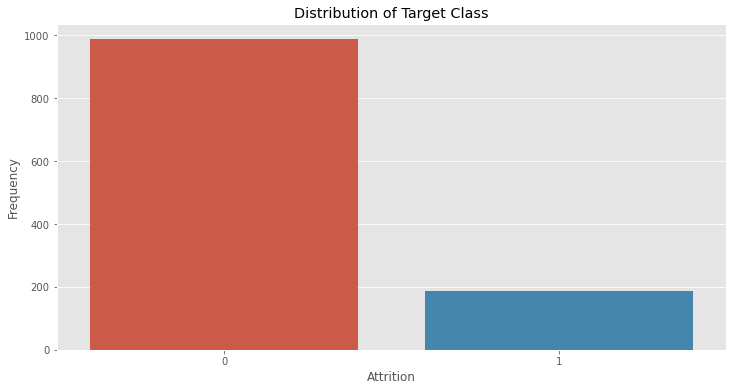

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(y_train)
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Distribution of Target Class")
plt.show()

In [94]:
y_train.value_counts()

0    988
1    188
Name: Attrition, dtype: int64

In [95]:
# The target class is imbalanced, let us first use the inbuilt model hyperparameter class_weight to balance the target labels.

### Logistic Regression

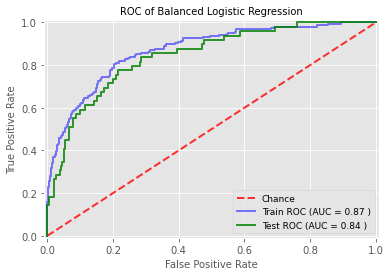

Train Data: Accuracy Score

0.7848639455782312


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       988
           1       0.41      0.82      0.55       188

    accuracy                           0.78      1176
   macro avg       0.69      0.80      0.70      1176
weighted avg       0.87      0.78      0.81      1176



Train Data: Kappa Cohen Score

0.42726684735739795


Train Data: Confusion Matrix

[[769 219]
 [ 34 154]]


Train Data: Jaccard Score

0.3783783783783784
Test Data: Accuracy Score

0.7653061224489796


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       245
           1       0.40      0.78      0.52        49

    accuracy                           0.77       294
   macro avg       0.67      0.77      0.68       294
weighted avg       0.85      0.77      0.79       294



Test Data: Kappa Cohen

AUC ROC Train  AUC ROC Test  Acc Train  \
Balanced Logistic Regression       0.869735      0.844065   0.784864   

                              Acc Test  Prec Train  Prec Test  Rec Train  \
Balanced Logistic Regression  0.765306    0.412869   0.395833   0.819149   

                              Rec Test  F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression   0.77551   0.54902  0.524138    0.427267   

                              KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression   0.389381    0.378378    0.35514

In [96]:
# default parameters
logit = LogisticRegression(random_state = 0, max_iter = 1000, class_weight="balanced")

models = [('Balanced Logistic Regression', logit)]

fit_predict_plot(X_train, X_test, y_train, y_test, models) # implementing the model

### Decision Tree

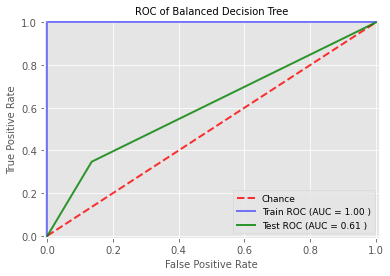

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 188]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.7789115646258503


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       245
           1       0.34      0.35      0.34        49

    accuracy                           0.78       294
   macro avg       0.60      0.61      0.61       294
weighted avg       0.78      0.78      0.78       294



Test Data: Kappa Cohen Score

0.21052631578947367


Test Data: Confu

AUC ROC Train  AUC ROC Test  Acc Train  \
Balanced Logistic Regression       0.869735      0.844065   0.784864   
Balanced Decision Tree             1.000000      0.606122   1.000000   

                              Acc Test  Prec Train  Prec Test  Rec Train  \
Balanced Logistic Regression  0.765306    0.412869   0.395833   0.819149   
Balanced Decision Tree        0.778912    1.000000   0.340000   1.000000   

                              Rec Test  F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression  0.775510   0.54902  0.524138    0.427267   
Balanced Decision Tree        0.346939   1.00000  0.343434    1.000000   

                              KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression   0.389381    0.378378   0.355140  
Balanced Decision Tree         0.210526    1.000000   0.207317

In [97]:
# with default parameters

dt = DecisionTreeClassifier(random_state = 0, class_weight="balanced")

models = []
models.append(('Balanced Decision Tree', dt))

fit_predict_plot(X_train, X_test, y_train, y_test, models) # implementing the model

### Random Forest

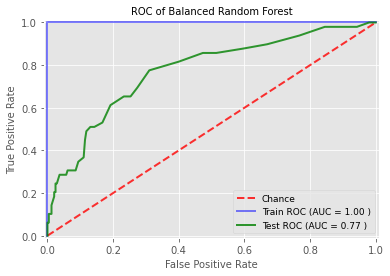

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 188]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.8401360544217688


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       0.75      0.06      0.11        49

    accuracy                           0.84       294
   macro avg       0.80      0.53      0.51       294
weighted avg       0.83      0.84      0.78       294



Test Data: Kappa Cohen Score

0.09032258064516141


Test Data: Confu

AUC ROC Train  AUC ROC Test  Acc Train  \
Balanced Logistic Regression       0.869735      0.844065   0.784864   
Balanced Decision Tree             1.000000      0.606122   1.000000   
Balanced Random Forest             1.000000      0.773053   1.000000   

                              Acc Test  Prec Train  Prec Test  Rec Train  \
Balanced Logistic Regression  0.765306    0.412869   0.395833   0.819149   
Balanced Decision Tree        0.778912    1.000000   0.340000   1.000000   
Balanced Random Forest        0.840136    1.000000   0.750000   1.000000   

                              Rec Test  F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression  0.775510   0.54902  0.524138    0.427267   
Balanced Decision Tree        0.346939   1.00000  0.343434    1.000000   
Balanced Random Forest        0.061224   1.00000  0.113208    1.000000   

                              KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression   0.389381    0.378378   0.355140  
Balanced Decision Tree         0.210526    1.000000   0.207317  
Balanced Random Forest         0.090323    1.000000   0.060000

In [98]:
# default parameters

rf = RandomForestClassifier(random_state = 0, class_weight="balanced")

models = []
models.append(('Balanced Random Forest',rf))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

### SVM

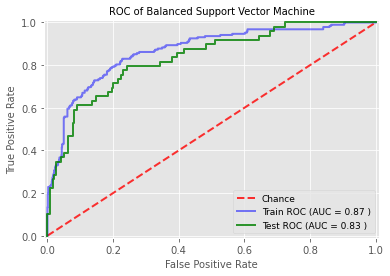

Train Data: Accuracy Score

0.7916666666666666


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       988
           1       0.42      0.80      0.55       188

    accuracy                           0.79      1176
   macro avg       0.69      0.79      0.71      1176
weighted avg       0.87      0.79      0.81      1176



Train Data: Kappa Cohen Score

0.43136604774535814


Train Data: Confusion Matrix

[[781 207]
 [ 38 150]]


Train Data: Jaccard Score

0.379746835443038
Test Data: Accuracy Score

0.7721088435374149


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       245
           1       0.40      0.78      0.53        49

    accuracy                           0.77       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.85      0.77      0.80       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  Acc Train  \
Balanced Logistic Regression          0.869735      0.844065   0.784864   
Balanced Decision Tree                1.000000      0.606122   1.000000   
Balanced Random Forest                1.000000      0.773053   1.000000   
Balanced Support Vector Machine       0.867861      0.834486   0.791667   

                                 Acc Test  Prec Train  Prec Test  Rec Train  \
Balanced Logistic Regression     0.765306    0.412869   0.395833   0.819149   
Balanced Decision Tree           0.778912    1.000000   0.340000   1.000000   
Balanced Random Forest           0.840136    1.000000   0.750000   1.000000   
Balanced Support Vector Machine  0.772109    0.420168   0.404255   0.797872   

                                 Rec Test  F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression     0.775510  0.549020  0.524138    0.427267   
Balanced Decision Tree           0.346939  1.000000  0.343434    1.000000   
Balanced Random Forest           0.061224  1.000000  0.113208    1.000000   
Balanced Support Vector Machine  0.775510  0.550459  0.531469    0.431366   

                                 KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression      0.389381    0.378378   0.355140  
Balanced Decision Tree            0.210526    1.000000   0.207317  
Balanced Random Forest            0.090323    1.000000   0.060000  
Balanced Support Vector Machine   0.400000    0.379747   0.361905

In [99]:
# default parameters

svm = SVC(kernel="linear", random_state = 0, probability=True, class_weight="balanced")

models = []
models.append(('Balanced Support Vector Machine',svm))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [100]:
# We have maximum misclassifications, as shown by the confusion matrix in Decision Tree and Random Forest. So we will further not make use of it.

# As we can see, out of all the Base Models, by way of relying on the performance metrics like Coonfusion matrix, Accuracy, Precision, Recall, F1-Score, AUC-ROC, etc
# The Support Vector Machine (SVM) amd Logistic Regression model seems to be giving much better results than the others.
# But the SVM model gives a slightly better result than Logistic regression in terms of better representatin of TN (both have same accuracy of class 1), higher TPR, lower FPR and better F1 score.

## Hyper-Parameter Tuning: GridSearchCV

### Logistic Regression

In [101]:
# Since our top performing models are SVM and Logistic Regression, we will try to improve the results using Hyper-Parameter tuning.

In [102]:
# Logistic Regression: Hyper-Parameter Tuning

penalty = ['l1', 'l2', 'elasticnet']
# default is L2

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = ["balanced"]
# balanced mode uses the values of y to automatically adjust 
# weights inversely proportional to class frequencies in the input data

solver = ['liblinear', 'saga']
# liblinear supports L1, L2 regularization
# saga supports Elastic Net


param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

In [103]:
grid_logit = GridSearchCV(estimator=logit, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_logit_result = grid_logit.fit(X_train, y_train)

print('Best Score: ', grid_logit_result.best_score_)
print('Best Params: ', grid_logit_result.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s


Best Score:  0.8209154640760306
Best Params:  {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    8.0s finished


LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=0, solver='saga')


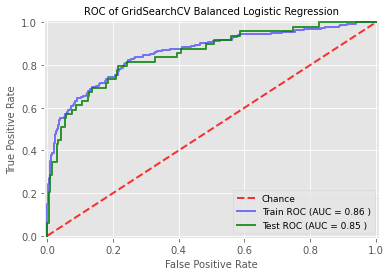

Train Data: Accuracy Score

0.7729591836734694


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       988
           1       0.39      0.79      0.53       188

    accuracy                           0.77      1176
   macro avg       0.67      0.78      0.69      1176
weighted avg       0.86      0.77      0.80      1176



Train Data: Kappa Cohen Score

0.39742999263080325


Train Data: Confusion Matrix

[[761 227]
 [ 40 148]]


Train Data: Jaccard Score

0.3566265060240964
Test Data: Accuracy Score

0.7857142857142857


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       245
           1       0.42      0.80      0.55        49

    accuracy                           0.79       294
   macro avg       0.69      0.79      0.71       294
weighted avg       0.86      0.79      0.81       294



Test Data: Kappa Cohen

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                    0.869735      0.844065   
Balanced Decision Tree                          1.000000      0.606122   
Balanced Random Forest                          1.000000      0.773053   
Balanced Support Vector Machine                 0.867861      0.834486   
GridSearchCV Balanced Logistic Regression       0.859888      0.851812   

                                           Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                0.784864  0.765306    0.412869   
Balanced Decision Tree                      1.000000  0.778912    1.000000   
Balanced Random Forest                      1.000000  0.840136    1.000000   
Balanced Support Vector Machine             0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression   0.772959  0.785714    0.394667   

                                           Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                0.395833   0.819149  0.775510   
Balanced Decision Tree                      0.340000   1.000000  0.346939   
Balanced Random Forest                      0.750000   1.000000  0.061224   
Balanced Support Vector Machine             0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression   0.423913   0.787234  0.795918   

                                           F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression               0.549020  0.524138    0.427267   
Balanced Decision Tree                     1.000000  0.343434    1.000000   
Balanced Random Forest                     1.000000  0.113208    1.000000   
Balanced Support Vector Machine            0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression  0.525755  0.553191    0.397430   

                                           KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression                0.389381    0.378378   0.355140  
Balanced Decision Tree                      0.210526    1.000000   0.207317  
Balanced Random Forest                      0.090323    1.000000   0.060000  
Balanced Support Vector Machine             0.400000    0.379747   0.361905  
GridSearchCV Balanced Logistic Regression   0.429003    0.356627   0.382353

In [104]:
print(grid_logit_result.best_estimator_)
best_logit = grid_logit_result.best_estimator_

# default parameters

models = []
models.append(('GridSearchCV Balanced Logistic Regression',best_logit))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

### SVM

In [105]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

In [106]:
grid_svm = GridSearchCV(estimator=svm, param_grid=tuned_parameters, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_svm_result = grid_svm.fit(X_train, y_train)

print('Best Score: ', grid_svm_result.best_score_)
print('Best Params: ', grid_svm_result.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  8.6min finished


Best Score:  0.8263682634374593
Best Params:  {'C': 25, 'gamma': 0.0001, 'kernel': 'rbf'}


SVC(C=25, class_weight='balanced', gamma=0.0001, probability=True,
    random_state=0)


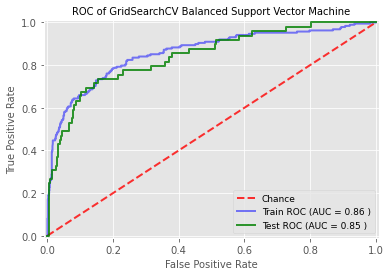

Train Data: Accuracy Score

0.7780612244897959


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.78      0.85       988
           1       0.40      0.79      0.53       188

    accuracy                           0.78      1176
   macro avg       0.68      0.78      0.69      1176
weighted avg       0.86      0.78      0.80      1176



Train Data: Kappa Cohen Score

0.40733131487889274


Train Data: Confusion Matrix

[[766 222]
 [ 39 149]]


Train Data: Jaccard Score

0.36341463414634145
Test Data: Accuracy Score

0.7755102040816326


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       245
           1       0.40      0.73      0.52        49

    accuracy                           0.78       294
   macro avg       0.67      0.76      0.69       294
weighted avg       0.85      0.78      0.80       294



Test Data: Kappa Cohe

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.000000   
Balanced Random Forest                        1.000000  0.113208    1.000000   
Balanced Support Vector Machine               0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression     0.525755  0.553191    0.397430   
GridSearchCV Balanced Support Vector Machine  0.533095  0.521739    0.407331   

                                              KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression                   0.389381    0.378378   0.355140  
Balanced Decision Tree                         0.210526    1.000000   0.207317  
Balanced Random Forest                         0.090323    1.000000   0.060000  
Balanced Support Vector Machine                0.400000    0.379747   0.361905  
GridSearchCV Balanced Logistic Regression      0.429003    0.356627   0.382353  
GridSearchCV Balanced Support Vector Machine   0.390769    0.363415   0.352941

In [107]:
print(grid_svm_result.best_estimator_)
best_svm = grid_svm_result.best_estimator_
# default parameters

models = []
models.append(('GridSearchCV Balanced Support Vector Machine',best_svm))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [108]:
# The best base model seems to be Hyper-Parameter Tuned Balanced Logistic Regression. So we will use ensemble techniques to further improve the result.

## Bagging

#### Logistic Regression

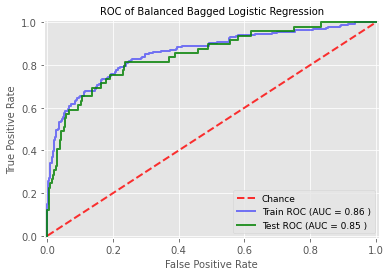

Train Data: Accuracy Score

0.7874149659863946


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       988
           1       0.41      0.78      0.54       188

    accuracy                           0.79      1176
   macro avg       0.68      0.78      0.70      1176
weighted avg       0.86      0.79      0.81      1176



Train Data: Kappa Cohen Score

0.416999809632591


Train Data: Confusion Matrix

[[780 208]
 [ 42 146]]


Train Data: Jaccard Score

0.3686868686868687
Test Data: Accuracy Score

0.7891156462585034


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       245
           1       0.43      0.76      0.54        49

    accuracy                           0.79       294
   macro avg       0.68      0.78      0.70       294
weighted avg       0.86      0.79      0.81       294



Test Data: Kappa Cohen S

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.000000   
Balanced Random Forest                        1.000000  0.113208    1.000000   
Balanced Support Vector Machine               0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression     0.525755  0.553191    0.397430   
GridSearchCV Balanced Support Vector Machine  0.533095  0.521739    0.407331   
Balanced Bagged Logistic Regression           0.538745  0.544118    0.417000   

                                              KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression                   0.389381    0.378378   0.355140  
Balanced Decision Tree                         0.210526    1.000000   0.207317  
Balanced Random Forest                         0.090323    1.000000   0.060000  
Balanced Support Vector Machine                0.400000    0.379747   0.361905  
GridSearchCV Balanced Logistic Regression      0.429003    0.356627   0.382353  
GridSearchCV Balanced Support Vector Machine   0.390769    0.363415   0.352941  
Balanced Bagged Logistic Regression            0.420561    0.368687   0.373737

In [109]:
bg_logit = BaggingClassifier(base_estimator=best_logit, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('Balanced Bagged Logistic Regression',bg_logit))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

#### Decision Tree

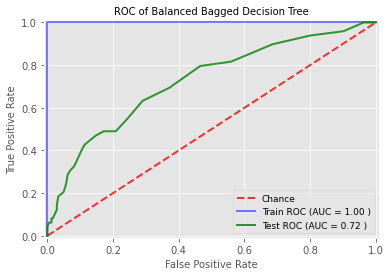

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 188]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.8333333333333334


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       245
           1       0.50      0.08      0.14        49

    accuracy                           0.83       294
   macro avg       0.67      0.53      0.52       294
weighted avg       0.79      0.83      0.78       294



Test Data: Kappa Cohen Score

0.09815950920245387


Test Data: Confu

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.000000   
Balanced Random Forest                        1.000000  0.113208    1.000000   
Balanced Support Vector Machine               0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression     0.525755  0.553191    0.397430   
GridSearchCV Balanced Support Vector Machine  0.533095  0.521739    0.407331   
Balanced Bagged Logistic Regression           0.538745  0.544118    0.417000   
Balanced Bagged Decision Tree                 1.000000  0.140351    1.000000   

                                              KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression                   0.389381    0.378378   0.355140  
Balanced Decision Tree                         0.210526    1.000000   0.207317  
Balanced Random Forest                         0.090323    1.000000   0.060000  
Balanced Support Vector Machine                0.400000    0.379747   0.361905  
GridSearchCV Balanced Logistic Regression      0.429003    0.356627   0.382353  
GridSearchCV Balanced Support Vector Machine   0.390769    0.363415   0.352941  
Balanced Bagged Logistic Regression            0.420561    0.368687   0.373737  
Balanced Bagged Decision Tree                  0.098160    1.000000   0.075472

In [110]:
bg_dt = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('Balanced Bagged Decision Tree',bg_dt))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

#### Random Forest

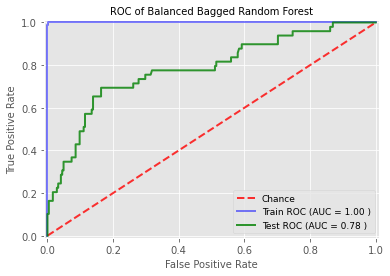

Train Data: Accuracy Score

0.9566326530612245


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       988
           1       1.00      0.73      0.84       188

    accuracy                           0.96      1176
   macro avg       0.98      0.86      0.91      1176
weighted avg       0.96      0.96      0.95      1176



Train Data: Kappa Cohen Score

0.8186326688600736


Train Data: Confusion Matrix

[[988   0]
 [ 51 137]]


Train Data: Jaccard Score

0.7287234042553191
Test Data: Accuracy Score

0.8401360544217688


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       1.00      0.04      0.08        49

    accuracy                           0.84       294
   macro avg       0.92      0.52      0.50       294
weighted avg       0.87      0.84      0.77       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.000000   
Balanced Random Forest                        1.000000  0.113208    1.000000   
Balanced Support Vector Machine               0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression     0.525755  0.553191    0.397430   
GridSearchCV Balanced Support Vector Machine  0.533095  0.521739    0.407331   
Balanced Bagged Logistic Regression           0.538745  0.544118    0.417000   
Balanced Bagged Decision Tree                 1.000000  0.140351    1.000000   
Balanced Bagged Random Forest                 0.843077  0.078431    0.818633   

                                              KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression                   0.389381    0.378378   0.355140  
Balanced Decision Tree                         0.210526    1.000000   0.207317  
Balanced Random Forest                         0.090323    1.000000   0.060000  
Balanced Support Vector Machine                0.400000    0.379747   0.361905  
GridSearchCV Balanced Logistic Regression      0.429003    0.356627   0.382353  
GridSearchCV Balanced Support Vector Machine   0.390769    0.363415   0.352941  
Balanced Bagged Logistic Regression            0.420561    0.368687   0.373737  
Balanced Bagged Decision Tree                  0.098160    1.000000   0.075472  
Balanced Bagged Random Forest                  0.066225    0.728723   0.040816

In [111]:
bg_rf = BaggingClassifier(base_estimator=rf, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('Balanced Bagged Random Forest',bg_rf))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

#### SVM

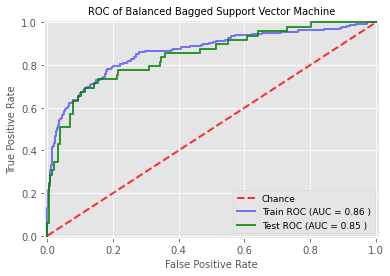

Train Data: Accuracy Score

0.8801020408163265


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       988
           1       0.89      0.29      0.43       188

    accuracy                           0.88      1176
   macro avg       0.88      0.64      0.68      1176
weighted avg       0.88      0.88      0.85      1176



Train Data: Kappa Cohen Score

0.3856118093431349


Train Data: Confusion Matrix

[[981   7]
 [134  54]]


Train Data: Jaccard Score

0.27692307692307694
Test Data: Accuracy Score

0.8673469387755102


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       245
           1       0.92      0.22      0.36        49

    accuracy                           0.87       294
   macro avg       0.89      0.61      0.64       294
weighted avg       0.87      0.87      0.83       294



Test Data: Kappa Cohen

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.000000   
Balanced Random Forest                        1.000000  0.113208    1.000000   
Balanced Support Vector Machine               0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression     0.525755  0.553191    0.397430   
GridSearchCV Balanced Support Vector Machine  0.533095  0.521739    0.407331   
Balanced Bagged Logistic Regression           0.538745  0.544118    0.417000   
Balanced Bagged Decision Tree                 1.000000  0.140351    1.000000   
Balanced Bagged Random Forest                 0.843077  0.078431    0.818633   
Balanced Bagged Support Vector Machine        0.433735  0.360656    0.385612   

                                              KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression                   0.389381    0.378378   0.355140  
Balanced Decision Tree                         0.210526    1.000000   0.207317  
Balanced Random Forest                         0.090323    1.000000   0.060000  
Balanced Support Vector Machine                0.400000    0.379747   0.361905  
GridSearchCV Balanced Logistic Regression      0.429003    0.356627   0.382353  
GridSearchCV Balanced Support Vector Machine   0.390769   

In [112]:
bg_svm = BaggingClassifier(base_estimator=best_svm, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('Balanced Bagged Support Vector Machine',bg_svm))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [113]:
# Bagging seems to be leading to a lot of FN's which can be seen in all the models, so we cannot use either of them.

In [114]:
# We still have Hyper-Parameter Tuned Logistic Regression as our best model.

### Boosting

#### Adaboost Logistic Regression

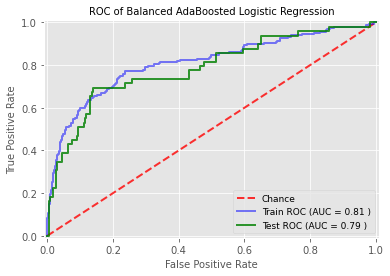

Train Data: Accuracy Score

0.1598639455782313


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       988
           1       0.16      1.00      0.28       188

    accuracy                           0.16      1176
   macro avg       0.08      0.50      0.14      1176
weighted avg       0.03      0.16      0.04      1176



Train Data: Kappa Cohen Score

0.0


Train Data: Confusion Matrix

[[  0 988]
 [  0 188]]


Train Data: Jaccard Score

0.1598639455782313
Test Data: Accuracy Score

0.16666666666666666


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       245
           1       0.17      1.00      0.29        49

    accuracy                           0.17       294
   macro avg       0.08      0.50      0.14       294
weighted avg       0.03      0.17      0.05       294



Test Data: Kappa Cohen Score

0.0


T

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   
Balanced AdaBoosted Logistic Regression        0.166667   1.000000  1.000000   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.000000   
Balanced Random Forest                        1.000000  0.113208    1.000000   
Balanced Support Vector Machine               0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression     0.525755  0.553191    0.397430   
GridSearchCV Balanced Support Vector Machine  0.533095  0.521739    0.407331   
Balanced Bagged Logistic Regression           0.538745  0.544118    0.417000   
Balanced Bagged Decision Tree                 1.000000  0.140351    1.000000   
Balanced Bagged Random Forest                 0.843077  0.078431    0.818633   
Balanced Bagged Support Vector Machine        0.433735  0.360656    0.385612   
Balanced AdaBoosted Logistic Regression       0.275660  0.285714    0.000000   

                                              KCoh Test  Jacc Train  Jacc Test  
Balanced Logistic Regression                   0.389381    0.378378   0.355140  
Balanced Decision Tree                         0.210526    1.000

In [115]:
adb_logit = AdaBoostClassifier(base_estimator=best_logit, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('Balanced AdaBoosted Logistic Regression',adb_logit))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [116]:
# High FP, cannot be a good model.

#### Adaboost Decision Tree

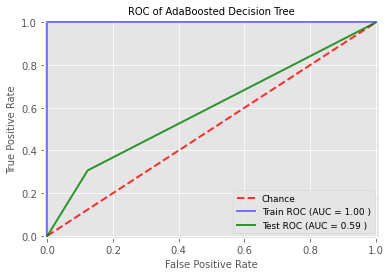

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 188]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.782312925170068


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       245
           1       0.33      0.31      0.32        49

    accuracy                           0.78       294
   macro avg       0.60      0.59      0.59       294
weighted avg       0.78      0.78      0.78       294



Test Data: Kappa Cohen Score

0.189873417721519


Test Data: Confusio

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   
Balanced AdaBoosted Logistic Regression        0.166667   1.000000  1.000000   
AdaBoosted Decision Tree                       0.333333   1.000000  0.306122   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.000000   
Balanced Random Forest                        1.000000  0.113208    1.000000   
Balanced Support Vector Machine               0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression     0.525755  0.553191    0.397430   
GridSearchCV Balanced Support Vector Machine  0.533095  0.521739    0.407331   
Balanced Bagged Logistic Regression           0.538745  0.544118    0.417000   
Balanced Bagged Decision Tree                 1.000000  0.140351    1.000000   
Balanced Bagged Random Forest                 0.843077  0.078431    0.818633   
Balanced Bagged Support Vector Machine        0.433735  0.360656    0.385612   
Balanced AdaBoosted Logistic Regression       0.275660  0.285714    0

In [117]:
adb_dt = AdaBoostClassifier(base_estimator=dt, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('AdaBoosted Decision Tree',adb_dt))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

#### Adaboost Random Forest

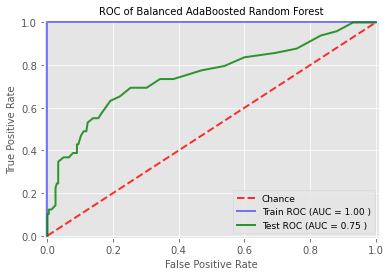

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 188]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.8435374149659864


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       245
           1       1.00      0.06      0.12        49

    accuracy                           0.84       294
   macro avg       0.92      0.53      0.51       294
weighted avg       0.87      0.84      0.78       294



Test Data: Kappa Cohen Score

0.0980392156862745


Test Data: Confus

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   
Balanced AdaBoosted Logistic Regression        0.166667   1.000000  1.000000   
AdaBoosted Decision Tree                       0.333333   1.000000  0.306122   
Balanced AdaBoosted Random Forest              1.000000   1.000000  0.061224   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.000000   
Balanced Random Forest                        1.000000  0.113208    1.000000   
Balanced Support Vector Machine               0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression     0.525755  0.553191    0.397430   
GridSearchCV Balanced Support Vector Machine  0.533095  0.521739    0.407331   
Balanced Bagged Logistic Regression           0.538745  0.544118    0.417000   
Balanced Bagged Decision Tree                 1.000000  0.140351    1.0

In [118]:
adb_rf = AdaBoostClassifier(base_estimator=rf, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('Balanced AdaBoosted Random Forest',adb_rf))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

#### Adaboost SVM

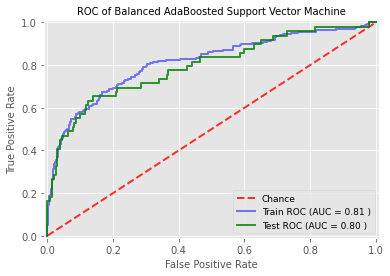

Train Data: Accuracy Score

0.8401360544217688


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       988
           1       0.00      0.00      0.00       188

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.71      0.84      0.77      1176



Train Data: Kappa Cohen Score

0.0


Train Data: Confusion Matrix

[[988   0]
 [188   0]]


Train Data: Jaccard Score

0.0
Test Data: Accuracy Score

0.8333333333333334


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



Test Data: Kappa Cohen Score

0.0


Test Data: Confus

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   
Balanced AdaBoosted Logistic Regression        0.166667   1.000000  1.000000   
AdaBoosted Decision Tree                       0.333333   1.000000  0.306122   
Balanced AdaBoosted Random Forest              1.000000   1.000000  0.061224   
Balanced AdaBoosted Support Vector Machine     0.000000   0.000000  0.000000   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.000000   
Balanced Random Forest                        1.000000  0.113208    1.000000   
Balanced Support Vector Machine               0.550459  0.531469    0.431366   
GridSearchCV Balanced Logistic Regression     0.525755  0.553191    0.397

In [119]:
adb_svm = AdaBoostClassifier(base_estimator=best_svm, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('Balanced AdaBoosted Support Vector Machine',adb_svm))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [120]:
# High FN, cannot be a good model.

#### Gradientboost Decision Tree

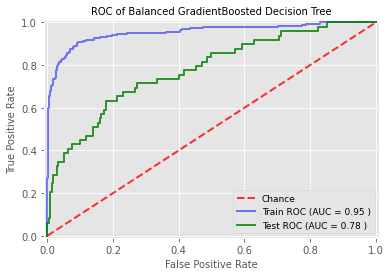

Train Data: Accuracy Score

0.9200680272108843


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       988
           1       0.97      0.52      0.67       188

    accuracy                           0.92      1176
   macro avg       0.94      0.76      0.81      1176
weighted avg       0.92      0.92      0.91      1176



Train Data: Kappa Cohen Score

0.6328515251355085


Train Data: Confusion Matrix

[[985   3]
 [ 91  97]]


Train Data: Jaccard Score

0.5078534031413613
Test Data: Accuracy Score

0.8605442176870748


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       245
           1       0.79      0.22      0.35        49

    accuracy                           0.86       294
   macro avg       0.82      0.61      0.64       294
weighted avg       0.85      0.86      0.83       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   
Balanced AdaBoosted Logistic Regression        0.166667   1.000000  1.000000   
AdaBoosted Decision Tree                       0.333333   1.000000  0.306122   
Balanced AdaBoosted Random Forest              1.000000   1.000000  0.061224   
Balanced AdaBoosted Support Vector Machine     0.000000   0.000000  0.000000   
Balanced GradientBoosted Decision Tree         0.785714   0.515957  0.224490   

                                              F1 Train   F1 Test  KCoh Train  \
Balanced Logistic Regression                  0.549020  0.524138    0.427267   
Balanced Decision Tree                        1.000000  0.343434    1.00000

In [121]:
gb_dt = GradientBoostingClassifier(n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('Balanced GradientBoosted Decision Tree',gb_dt))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [122]:
# None of the boosting algorithms on the base models seems to be working, as they have either high FN or high FP. 
# Still, Hyper-Parameter Tuned Logistic Regression seems to give the most favoured result.

## Class Balancing using SMOTE

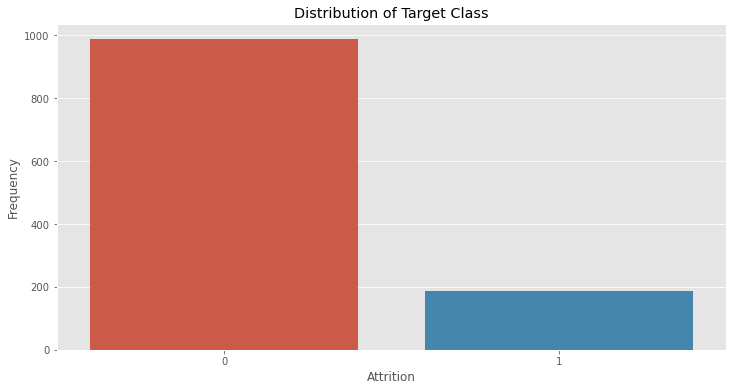

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(y_train)
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Distribution of Target Class")
plt.show()

In [124]:
y_train.value_counts()

0    988
1    188
Name: Attrition, dtype: int64

In [125]:
from imblearn.over_sampling import SMOTE

In [126]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

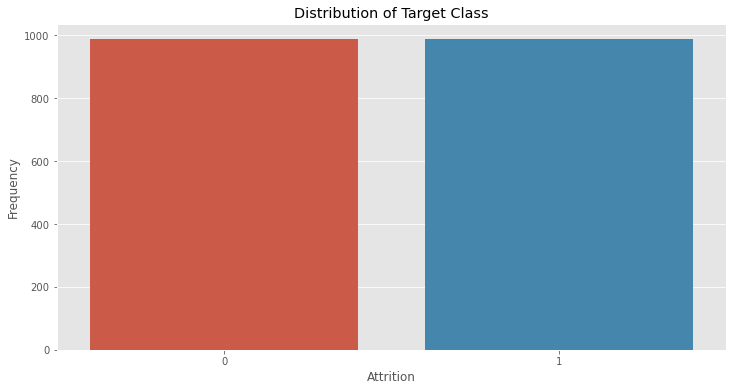

In [127]:
plt.figure(figsize=(12,6))
sns.countplot(y_train_smt)
plt.xlabel("Attrition")
plt.ylabel("Frequency")
plt.title("Distribution of Target Class")
plt.show()

In [128]:
# We have balanced the target labels using SMOTE, let us 

### Logistic Regression

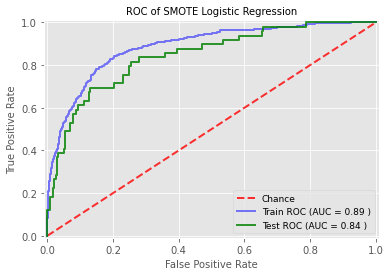

Train Data: Accuracy Score

0.8183198380566802


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       988
           1       0.81      0.84      0.82       988

    accuracy                           0.82      1976
   macro avg       0.82      0.82      0.82      1976
weighted avg       0.82      0.82      0.82      1976



Train Data: Kappa Cohen Score

0.6366396761133604


Train Data: Confusion Matrix

[[787 201]
 [158 830]]


Train Data: Jaccard Score

0.6980656013456686
Test Data: Accuracy Score

0.7551020408163265


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       245
           1       0.38      0.78      0.51        49

    accuracy                           0.76       294
   macro avg       0.66      0.76      0.67       294
weighted avg       0.85      0.76      0.78       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   
Balanced AdaBoosted Logistic Regression        0.166667   1.000000  1.000000   
AdaBoosted Decision Tree                       0.333333   1.000000  0.306122   
Balanced AdaBoosted Random Forest              1.000000   1.000000  0.061224   
Balanced AdaBoosted Support Vector Machine     0.000000   0.000000  0.000000   
Balanced GradientBoosted Decision Tree         0.785714   0.515957  0.224490   
SMOTE Logistic Regression                      0.383838   0.840081  0.775510  

In [129]:
# default parameters
logit_smote = LogisticRegression(random_state = 0, max_iter = 1000) 

models = [('SMOTE Logistic Regression', logit_smote)]

fit_predict_plot(X_train_smt, X_test, y_train_smt, y_test, models) # implementing the model

In [130]:
# Logistic Regressing using SMOTE balancing technique, seems to be slightly better than SVM balanced using class weights.

### Decision Tree

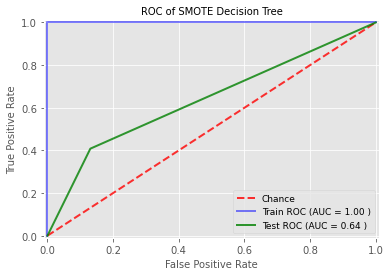

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 988]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.7925170068027211


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       245
           1       0.38      0.41      0.40        49

    accuracy                           0.79       294
   macro avg       0.63      0.64      0.64       294
weighted avg       0.80      0.79      0.79       294



Test Data: Kappa Cohen Score

0.2709163346613547


Test Data: Confus

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   
Balanced AdaBoosted Logistic Regression        0.166667   1.000000  1.000000   
AdaBoosted Decision Tree                       0.333333   1.000000  0.306122   
Balanced AdaBoosted Random Forest              1.000000   1.000000  0.061224   
Balanced AdaBoosted Support Vector Machine     0.000000   0.000000  0.000000   


In [131]:
# with default parameters

dt_smote = DecisionTreeClassifier(random_state = 0)

models = []
models.append(('SMOTE Decision Tree', dt_smote))

fit_predict_plot(X_train_smt, X_test, y_train_smt, y_test, models) # implementing the model

### Random Forest

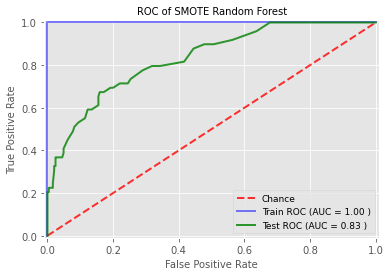

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 988]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.8673469387755102


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       245
           1       0.75      0.31      0.43        49

    accuracy                           0.87       294
   macro avg       0.81      0.64      0.68       294
weighted avg       0.85      0.87      0.84       294



Test Data: Kappa Cohen Score

0.374331550802139


Test Data: Confusi

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   
Balanced AdaBoosted Logistic Regression        0.166667   1.000000  1.000000   
AdaBoosted Decision Tree                       0.333333   1.000000  0.306122   
Ba

In [132]:
# default parameters

rf_smote = RandomForestClassifier(random_state = 0)

models = []
models.append(('SMOTE Random Forest',rf_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

### SVM

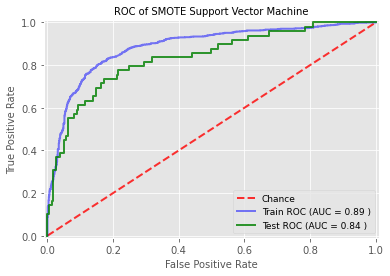

Train Data: Accuracy Score

0.8168016194331984


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       988
           1       0.80      0.84      0.82       988

    accuracy                           0.82      1976
   macro avg       0.82      0.82      0.82      1976
weighted avg       0.82      0.82      0.82      1976



Train Data: Kappa Cohen Score

0.6336032388663968


Train Data: Confusion Matrix

[[785 203]
 [159 829]]


Train Data: Jaccard Score

0.6960537363560033
Test Data: Accuracy Score

0.7789115646258503


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.78      0.86       245
           1       0.41      0.76      0.53        49

    accuracy                           0.78       294
   macro avg       0.68      0.77      0.69       294
weighted avg       0.85      0.78      0.80       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanced Bagged Random Forest                  1.000000   0.728723  0.040816   
Balanced Bagged Support Vector Machine         0.916667   0.287234  0.224490   
Bala

In [133]:
# default parameters

svm_smote = SVC(kernel="linear", random_state = 0, probability=True)

models = []
models.append(('SMOTE Support Vector Machine',svm_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

In [134]:
# We will choose the SMOTE based on Logistic Regression as our ideal base model.
# Although SMOTE using SVM gives us a similar result, but the Logit model using SMOTE seems to be the best.

## Hyper-Parameter Tuning: GridSearchCV

### Logistic Regression

In [135]:
# Since our top performing models are SVM and Logistic Regression using SMOTE, we will try to improve the results using Hyper-Parameter tuning.

In [136]:
# Logistic Regression: Hyper-Parameter Tuning

penalty = ['l1', 'l2', 'elasticnet']
# default is L2

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

class_weight = ["balanced"]
# balanced mode uses the values of y to automatically adjust 
# weights inversely proportional to class frequencies in the input data

solver = ['liblinear', 'saga']
# liblinear supports L1, L2 regularization
# saga supports Elastic Net


param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

In [137]:
grid_logit_smote = GridSearchCV(estimator=logit_smote, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_logit_result_smote = grid_logit.fit(X_train_smt, y_train_smt)

print('Best Score: ', grid_logit_result_smote.best_score_)
print('Best Params: ', grid_logit_result_smote.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.2s


Best Score:  0.8772718985993867
Best Params:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    9.3s finished


LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=0, solver='saga')


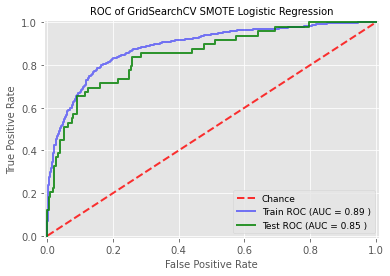

Train Data: Accuracy Score

0.8117408906882592


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       988
           1       0.80      0.84      0.82       988

    accuracy                           0.81      1976
   macro avg       0.81      0.81      0.81      1976
weighted avg       0.81      0.81      0.81      1976



Train Data: Kappa Cohen Score

0.6234817813765182


Train Data: Confusion Matrix

[[775 213]
 [159 829]]


Train Data: Jaccard Score

0.6902581182348043
Test Data: Accuracy Score

0.7551020408163265


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       245
           1       0.38      0.78      0.51        49

    accuracy                           0.76       294
   macro avg       0.66      0.76      0.67       294
weighted avg       0.85      0.76      0.78       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced Bagged Logistic Regression            0.425287   0.776596  0.755102   
Balanced Bagged Decision Tree                  0.500000   1.000000  0.081633   
Balanc

In [138]:
print(grid_logit_result_smote.best_estimator_)
best_logit_smote = grid_logit_result_smote.best_estimator_

# default parameters

models = []
models.append(('GridSearchCV SMOTE Logistic Regression',best_logit_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

### SVM

In [139]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

In [140]:
grid_svm_smote = GridSearchCV(estimator=svm_smote, param_grid=tuned_parameters, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5, return_train_score=True)
grid_svm_result_smote = grid_svm.fit(X_train_smt, y_train_smt)

print('Best Score: ', grid_svm_result_smote.best_score_)
print('Best Params: ', grid_svm_result_smote.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 13.9min finished


Best Score:  0.9864018071293875
Best Params:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


SVC(C=1000, class_weight='balanced', gamma=0.01, probability=True,
    random_state=0)


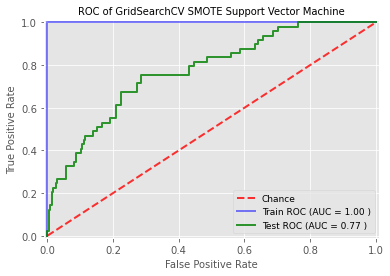

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 988]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.8163265306122449


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       245
           1       0.44      0.41      0.43        49

    accuracy                           0.82       294
   macro avg       0.66      0.65      0.66       294
weighted avg       0.81      0.82      0.81       294



Test Data: Kappa Cohen Score

0.31645569620253167


Test Data: Confu

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   
GridSearchCV SMOTE Support Vector Machine      1.000000  0.816327    1.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearchCV Balanced Logistic Regression      0.423913   0.787234  0.795918   
GridSearchCV Balanced Support Vector Machine   0.404494   0.792553  0.734694   
Balanced

In [141]:
print(grid_svm_result_smote.best_estimator_)
best_svm_smote = grid_svm_result_smote.best_estimator_
# default parameters

models = []
models.append(('GridSearchCV SMOTE Support Vector Machine',best_svm_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

In [142]:
# Hyper-tuned SVM seems to increase the TN but reduce the recall drastically.

### Bagging

In [143]:
# We will use the SMOTE base models, for Ensemble Techniques

#### Logistic Regression

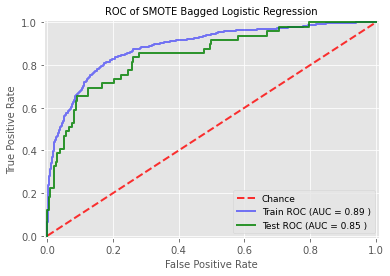

Train Data: Accuracy Score

0.812753036437247


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       988
           1       0.80      0.84      0.82       988

    accuracy                           0.81      1976
   macro avg       0.81      0.81      0.81      1976
weighted avg       0.81      0.81      0.81      1976



Train Data: Kappa Cohen Score

0.6255060728744939


Train Data: Confusion Matrix

[[775 213]
 [157 831]]


Train Data: Jaccard Score

0.6919233971690258
Test Data: Accuracy Score

0.7517006802721088


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       245
           1       0.38      0.80      0.52        49

    accuracy                           0.75       294
   macro avg       0.67      0.77      0.67       294
weighted avg       0.85      0.75      0.78       294



Test Data: Kappa Cohen S

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   
GridSearchCV SMOTE Support Vector Machine      1.000000  0.816327    1.000000   
SMOTE Bagged Logistic Regression               0.812753  0.751701    0.795977   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Random Forest                         0.750000   1.000000  0.061224   
Balanced Support Vector Machine                0.404255   0.797872  0.775510   
GridSearch

In [144]:
bg_logit_smote = BaggingClassifier(base_estimator=best_logit_smote, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('SMOTE Bagged Logistic Regression',bg_logit_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

In [145]:
# SMOTE based Logit and Bagged Logit give similar results, but SMOTE based Logit seems slightly favourable due to si]lightly higher AUC-ROC score.

#### Decision Tree

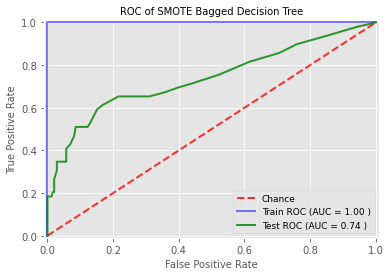

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 988]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.8435374149659864


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       245
           1       0.55      0.35      0.42        49

    accuracy                           0.84       294
   macro avg       0.71      0.64      0.67       294
weighted avg       0.82      0.84      0.83       294



Test Data: Kappa Cohen Score

0.3397129186602871


Test Data: Confus

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   
SMOTE Bagged Decision Tree                         1.000000      0.738859   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   
GridSearchCV SMOTE Support Vector Machine      1.000000  0.816327    1.000000   
SMOTE Bagged Logistic Regression               0.812753  0.751701    0.795977   
SMOTE Bagged Decision Tree                     1.000000  0.843537    1.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logistic Regression                   0.395833   0.819149  0.775510   
Balanced Decision Tree                         0.340000   1.000000  0.346939   
Balanced Ran

In [146]:
bg_dt_smote = BaggingClassifier(base_estimator=dt_smote, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('SMOTE Bagged Decision Tree',bg_dt_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

#### Random Forest

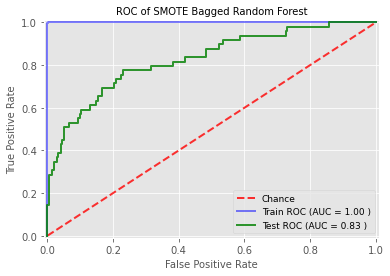

Train Data: Accuracy Score

0.9984817813765182


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



Train Data: Kappa Cohen Score

0.9969635627530364


Train Data: Confusion Matrix

[[988   0]
 [  3 985]]


Train Data: Jaccard Score

0.9969635627530364
Test Data: Accuracy Score

0.8707482993197279


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.74      0.35      0.47        49

    accuracy                           0.87       294
   macro avg       0.81      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   
SMOTE Bagged Decision Tree                         1.000000      0.738859   
SMOTE Bagged Random Forest                         0.999999      0.827572   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   
GridSearchCV SMOTE Support Vector Machine      1.000000  0.816327    1.000000   
SMOTE Bagged Logistic Regression               0.812753  0.751701    0.795977   
SMOTE Bagged Decision Tree                     1.000000  0.843537    1.000000   
SMOTE Bagged Random Forest                     0.998482  0.870748    1.000000   

                                              Prec Test  Rec Train  Rec Test  \
Balanced Logis

In [147]:
bg_rf_smote = BaggingClassifier(base_estimator=rf_smote, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('SMOTE Bagged Random Forest',bg_rf_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

#### SVM

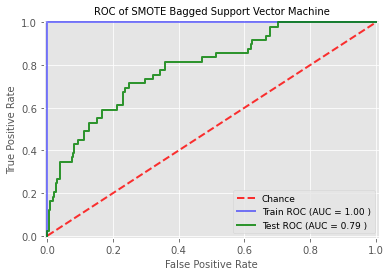

Train Data: Accuracy Score

0.9994939271255061


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



Train Data: Kappa Cohen Score

0.9989878542510121


Train Data: Confusion Matrix

[[988   0]
 [  1 987]]


Train Data: Jaccard Score

0.9989878542510121
Test Data: Accuracy Score

0.8333333333333334


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       245
           1       0.50      0.35      0.41        49

    accuracy                           0.83       294
   macro avg       0.69      0.64      0.66       294
weighted avg       0.81      0.83      0.82       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   
SMOTE Bagged Decision Tree                         1.000000      0.738859   
SMOTE Bagged Random Forest                         0.999999      0.827572   
SMOTE Bagged Support Vector Machine                1.000000      0.789921   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   
GridSearchCV SMOTE Support Vector Machine      1.000000  0.816327    1.000000   
SMOTE Bagged Logistic Regression               0.812753  0.751701    0.795977   
SMOTE Bagged Decision Tree                     1.000000  0.843537    1.000000   
SMOTE Bagged Random Forest                     0.998482  0.870748    1.000000   
SMOTE Bagged Suppo

In [148]:
bg_svm_smote = BaggingClassifier(base_estimator=best_svm_smote, n_estimators=50, random_state=0, oob_score=True)

# default parameters

models = []
models.append(('SMOTE Bagged Support Vector Machine',bg_svm_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

In [149]:
# The ideal model is still Hyper-Parameter Tuned Logistic Regression

### Boosting

#### Adaboost Logistic Regression

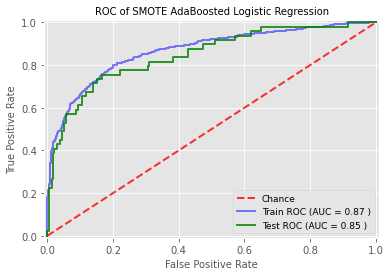

Train Data: Accuracy Score

0.7859311740890689


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       988
           1       0.76      0.83      0.79       988

    accuracy                           0.79      1976
   macro avg       0.79      0.79      0.79      1976
weighted avg       0.79      0.79      0.79      1976



Train Data: Kappa Cohen Score

0.5718623481781376


Train Data: Confusion Matrix

[[737 251]
 [172 816]]


Train Data: Jaccard Score

0.6585956416464891
Test Data: Accuracy Score

0.7755102040816326


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       245
           1       0.41      0.76      0.53        49

    accuracy                           0.78       294
   macro avg       0.67      0.77      0.69       294
weighted avg       0.85      0.78      0.80       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   
SMOTE Bagged Decision Tree                         1.000000      0.738859   
SMOTE Bagged Random Forest                         0.999999      0.827572   
SMOTE Bagged Support Vector Machine                1.000000      0.789921   
SMOTE AdaBoosted Logistic Regression               0.868513      0.847480   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   
GridSearchCV SMOTE Support Vector Machine      1.000000  0.816327    1.000000   
SMOTE Bagged Logistic Regression               0.812753  0.751701    0.795977   
SMOTE Bagged Decision Tree                     1.000000  0.843537    1.000000   
SMOTE Bagged Random Fo

In [150]:
adb_logit_smote = AdaBoostClassifier(base_estimator=best_logit_smote, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('SMOTE AdaBoosted Logistic Regression',adb_logit_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

In [151]:
# SMOTE based Adaboosted Logit seems slightly worse than Hyper-Parameter Tuned Logit in terms of recall score. 

#### Adaboost Decision Tree

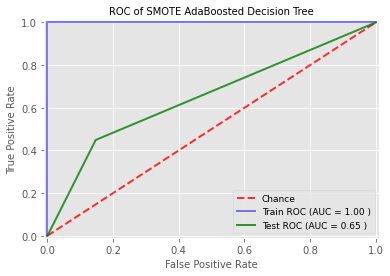

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 988]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.7857142857142857


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       245
           1       0.38      0.45      0.41        49

    accuracy                           0.79       294
   macro avg       0.63      0.65      0.64       294
weighted avg       0.80      0.79      0.79       294



Test Data: Kappa Cohen Score

0.28136882129277574


Test Data: Confu

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   
SMOTE Bagged Decision Tree                         1.000000      0.738859   
SMOTE Bagged Random Forest                         0.999999      0.827572   
SMOTE Bagged Support Vector Machine                1.000000      0.789921   
SMOTE AdaBoosted Logistic Regression               0.868513      0.847480   
SMOTE AdaBoosted Decision Tree                     1.000000      0.651020   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   
GridSearchCV SMOTE Support Vector Machine      1.000000  0.816327    1.000000   
SMOTE Bagged Logistic Regression               0.812753  0.751701    0.795977   
SMOTE Bagged Decision Tree

In [152]:
adb_dt_smote = AdaBoostClassifier(base_estimator=dt_smote, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('SMOTE AdaBoosted Decision Tree',adb_dt_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

#### Adaboost Random Forest

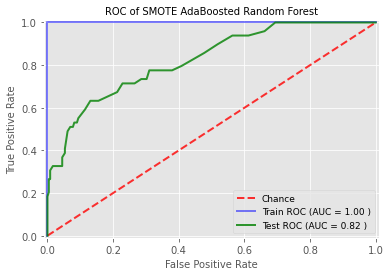

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 988]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.8673469387755102


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       245
           1       0.73      0.33      0.45        49

    accuracy                           0.87       294
   macro avg       0.80      0.65      0.69       294
weighted avg       0.85      0.87      0.85       294



Test Data: Kappa Cohen Score

0.38743455497382207


Test Data: Confu

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   
SMOTE Bagged Decision Tree                         1.000000      0.738859   
SMOTE Bagged Random Forest                         0.999999      0.827572   
SMOTE Bagged Support Vector Machine                1.000000      0.789921   
SMOTE AdaBoosted Logistic Regression               0.868513      0.847480   
SMOTE AdaBoosted Decision Tree                     1.000000      0.651020   
SMOTE AdaBoosted Random Forest                     1.000000      0.823657   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   
GridSearchCV SMOTE Support Vector Machine      1.000000  0.816327    1.000000   
SMOTE Bagged Logistic Regressi

In [153]:
adb_rf_smote = AdaBoostClassifier(base_estimator=rf_smote, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('SMOTE AdaBoosted Random Forest',adb_rf_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

#### Adaboost SVM

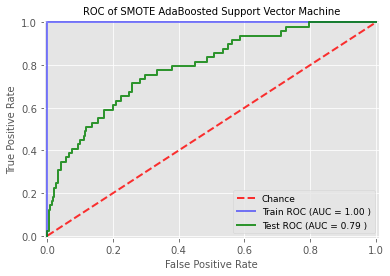

Train Data: Accuracy Score

1.0


Train Data: Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       988
           1       1.00      1.00      1.00       988

    accuracy                           1.00      1976
   macro avg       1.00      1.00      1.00      1976
weighted avg       1.00      1.00      1.00      1976



Train Data: Kappa Cohen Score

1.0


Train Data: Confusion Matrix

[[988   0]
 [  0 988]]


Train Data: Jaccard Score

1.0
Test Data: Accuracy Score

0.8333333333333334


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       245
           1       0.50      0.41      0.45        49

    accuracy                           0.83       294
   macro avg       0.69      0.66      0.68       294
weighted avg       0.82      0.83      0.83       294



Test Data: Kappa Cohen Score

0.35242290748898686


Test Data: Confu

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   
SMOTE Bagged Decision Tree                         1.000000      0.738859   
SMOTE Bagged Random Forest                         0.999999      0.827572   
SMOTE Bagged Support Vector Machine                1.000000      0.789921   
SMOTE AdaBoosted Logistic Regression               0.868513      0.847480   
SMOTE AdaBoosted Decision Tree                     1.000000      0.651020   
SMOTE AdaBoosted Random Forest                     1.000000      0.823657   
SMOTE AdaBoosted Support Vector Machine            1.000000      0.790504   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression         0.811741  0.755102    0.795585   
GridSearchCV SMOTE Support Vector 

In [154]:
adb_svm_smote = AdaBoostClassifier(base_estimator=best_svm_smote, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('SMOTE AdaBoosted Support Vector Machine',adb_svm_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

#### Gradientboost Decision Tree

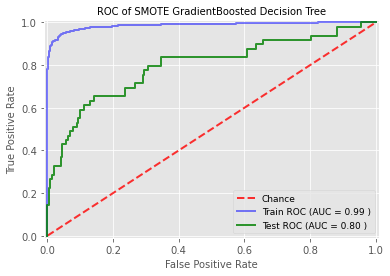

Train Data: Accuracy Score

0.9463562753036437


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       988
           1       0.98      0.91      0.94       988

    accuracy                           0.95      1976
   macro avg       0.95      0.95      0.95      1976
weighted avg       0.95      0.95      0.95      1976



Train Data: Kappa Cohen Score

0.8927125506072875


Train Data: Confusion Matrix

[[968  20]
 [ 86 902]]


Train Data: Jaccard Score

0.8948412698412699
Test Data: Accuracy Score

0.8571428571428571


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.62      0.37      0.46        49

    accuracy                           0.86       294
   macro avg       0.75      0.66      0.69       294
weighted avg       0.84      0.86      0.84       294



Test Data: Kappa Cohen 

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   
SMOTE Bagged Decision Tree                         1.000000      0.738859   
SMOTE Bagged Random Forest                         0.999999      0.827572   
SMOTE Bagged Support Vector Machine                1.000000      0.789921   
SMOTE AdaBoosted Logistic Regression               0.868513      0.847480   
SMOTE AdaBoosted Decision Tree                     1.000000      0.651020   
SMOTE AdaBoosted Random Forest                     1.000000      0.823657   
SMOTE AdaBoosted Support Vector Machine            1.000000      0.790504   
SMOTE GradientBoosted Decision Tree                0.987246      0.796418   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression

In [155]:
gb_dt_smote = GradientBoostingClassifier(n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('SMOTE GradientBoosted Decision Tree',gb_dt_smote))

fit_predict_plot(X_train_smt,X_test,y_train_smt,y_test,models)

In [156]:
# From the above, we will go ahead with Hyper-Parameter Tuned Balanced Logistic Regression as our ideal model.
# We will further try out feature selection techniques to improve the results.

In [157]:
dfObj

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                       0.869735      0.844065   
Balanced Decision Tree                             1.000000      0.606122   
Balanced Random Forest                             1.000000      0.773053   
Balanced Support Vector Machine                    0.867861      0.834486   
GridSearchCV Balanced Logistic Regression          0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine       0.860114      0.845065   
Balanced Bagged Logistic Regression                0.858956      0.846980   
Balanced Bagged Decision Tree                      1.000000      0.724531   
Balanced Bagged Random Forest                      0.999989      0.782507   
Balanced Bagged Support Vector Machine             0.863269      0.846231   
Balanced AdaBoosted Logistic Regression            0.811283      0.787755   
AdaBoosted Decision Tree                           1.000000      0.591837   
Balanced AdaBoosted Random Forest                  1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine         0.813889      0.795085   
Balanced GradientBoosted Decision Tree             0.954696      0.778426   
SMOTE Logistic Regression                          0.887083      0.844315   
SMOTE Decision Tree                                1.000000      0.638776   
SMOTE Random Forest                                1.000000      0.831029   
SMOTE Support Vector Machine                       0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression             0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine          1.000000      0.773844   
SMOTE Bagged Logistic Regression                   0.887359      0.847813   
SMOTE Bagged Decision Tree                         1.000000      0.738859   
SMOTE Bagged Random Forest                         0.999999      0.827572   
SMOTE Bagged Support Vector Machine                1.000000      0.789921   
SMOTE AdaBoosted Logistic Regression               0.868513      0.847480   
SMOTE AdaBoosted Decision Tree                     1.000000      0.651020   
SMOTE AdaBoosted Random Forest                     1.000000      0.823657   
SMOTE AdaBoosted Support Vector Machine            1.000000      0.790504   
SMOTE GradientBoosted Decision Tree                0.987246      0.796418   

                                              Acc Train  Acc Test  Prec Train  \
Balanced Logistic Regression                   0.784864  0.765306    0.412869   
Balanced Decision Tree                         1.000000  0.778912    1.000000   
Balanced Random Forest                         1.000000  0.840136    1.000000   
Balanced Support Vector Machine                0.791667  0.772109    0.420168   
GridSearchCV Balanced Logistic Regression      0.772959  0.785714    0.394667   
GridSearchCV Balanced Support Vector Machine   0.778061  0.775510    0.401617   
Balanced Bagged Logistic Regression            0.787415  0.789116    0.412429   
Balanced Bagged Decision Tree                  1.000000  0.833333    1.000000   
Balanced Bagged Random Forest                  0.956633  0.840136    1.000000   
Balanced Bagged Support Vector Machine         0.880102  0.867347    0.885246   
Balanced AdaBoosted Logistic Regression        0.159864  0.166667    0.159864   
AdaBoosted Decision Tree                       1.000000  0.782313    1.000000   
Balanced AdaBoosted Random Forest              1.000000  0.843537    1.000000   
Balanced AdaBoosted Support Vector Machine     0.840136  0.833333    0.000000   
Balanced GradientBoosted Decision Tree         0.920068  0.860544    0.970000   
SMOTE Logistic Regression                      0.818320  0.755102    0.805044   
SMOTE Decision Tree                            1.000000  0.792517    1.000000   
SMOTE Random Forest                            1.000000  0.867347    1.000000   
SMOTE Support Vector Machine                   0.816802  0.778912    0.803295   
GridSearchCV SMOTE Logistic Regression

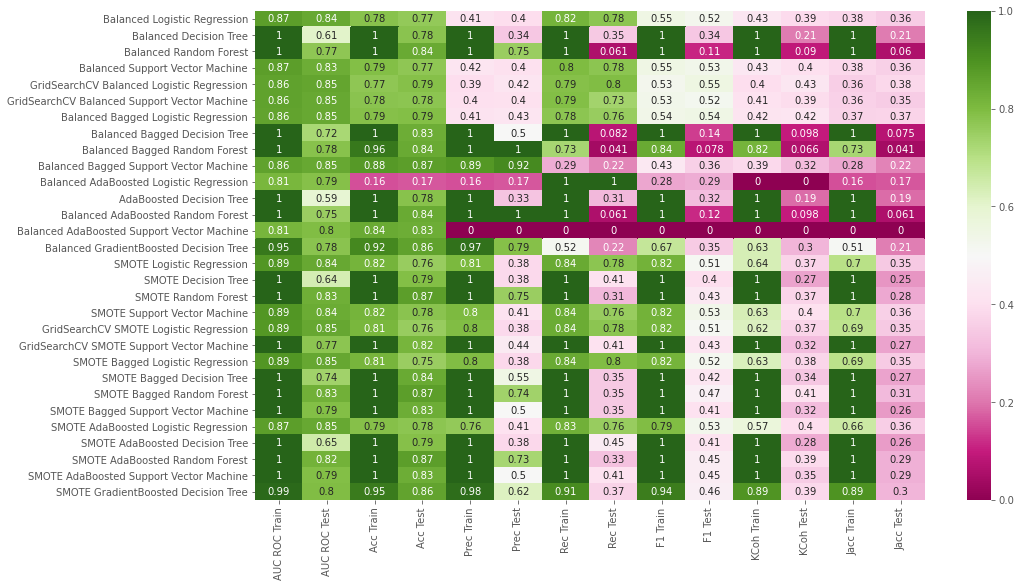

In [158]:
plt.figure(figsize=(15,9))
sns.heatmap(dfObj, annot=True, cmap="PiYG")
plt.show()

In [159]:
# We see that Hyper-Parameter Tuned Logistic Regression using Class Balancing gives the better result.

# Feature Engineering

## Recursive Feature Elimination (RFE)

In [160]:
X = df1.drop("Attrition", axis=1)
y = df1["Attrition"]

In [161]:
from sklearn.feature_selection import RFE

# best_logit_rfe = AdaBoostClassifier(base_estimator=best_logit, n_estimators= 50, random_state=0)
# best_logit_rfe.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(best_logit, verbose =3 )
rfe.fit(X,y)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.


RFE(estimator=LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                                 random_state=0, solver='saga'),
    verbose=3)

In [162]:
print("Overall Accuracy using RFE: ", rfe.score(X,y))

Overall Accuracy using RFE:  0.7306122448979592


In [163]:
print("Number of Features: ", rfe.n_features_)

Number of Features:  23


In [164]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True])

In [165]:
rfe.ranking_

array([ 1,  1,  6,  1,  5, 12, 15,  1, 21,  7,  1, 23,  1,  8, 16,  1, 11,
        1,  3,  2, 18,  1,  1,  1,  1, 19,  1,  1,  1,  1,  1,  1, 17,  1,
       13, 24, 10,  1,  1, 22,  1, 25,  9, 20, 14,  4,  1])

In [166]:
print("Selected Features: ")
colcheck = pd.Series(rfe.support_, index = list(X.columns))
colcheck[colcheck == True].index

Selected Features: 


Index(['Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Marketing', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Laboratory Technician',
       'JobRole_Sales Representative'],
      dtype='object')

In [167]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

Features sorted by their rank:
[(1, 'Age'), (1, 'BusinessTravel'), (1, 'Department_Research & Development'), (1, 'Department_Sales'), (1, 'DistanceFromHome'), (1, 'EducationField_Marketing'), (1, 'EnvironmentSatisfaction'), (1, 'JobInvolvement'), (1, 'JobRole_Laboratory Technician'), (1, 'JobRole_Sales Representative'), (1, 'JobSatisfaction'), (1, 'MaritalStatus_Married'), (1, 'MaritalStatus_Single'), (1, 'NumCompaniesWorked'), (1, 'OverTime'), (1, 'StandardHours'), (1, 'StockOptionLevel'), (1, 'TotalWorkingYears'), (1, 'TrainingTimesLastYear'), (1, 'YearsAtCompany'), (1, 'YearsInCurrentRole'), (1, 'YearsSinceLastPromotion'), (1, 'YearsWithCurrManager'), (2, 'PerformanceRating'), (3, 'PercentSalaryHike'), (4, 'JobRole_Sales Executive'), (5, 'Education'), (6, 'DailyRate'), (7, 'HourlyRate'), (8, 'MonthlyIncome'), (9, 'JobRole_Manufacturing Director'), (10, 'EducationField_Technical Degree'), (11, 'Over18'), (12, 'EmployeeCount'), (13, 'EducationField_Medical'), (14, 'JobRole_Research Sc

In [168]:
# RFE has selected the top 23 features to be used for the model.

In [169]:
X = df1[['Age', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Marketing', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Laboratory Technician',
       'JobRole_Sales Representative']]
y = df1['Attrition']

In [170]:
# RFE has selected the top 23 features to be used for the model.

In [171]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()#instantiate
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df1 = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df1.head()

Age  BusinessTravel  DistanceFromHome  EnvironmentSatisfaction  \
0  0.446350       -0.162399         -1.010909                -0.660531   
1  1.322365        1.717339         -0.147150                 0.254625   
2  0.008343       -0.162399         -0.887515                 1.169781   
3 -0.429664        1.717339         -0.764121                 1.169781   
4 -1.086676       -0.162399         -0.887515                -1.575686   

   JobInvolvement  JobSatisfaction  NumCompaniesWorked  OverTime  \
0        0.379672         1.153254            2.125136  1.591746   
1       -1.026167        -0.660853           -0.678049 -0.628241   
2       -1.026167         0.246200            1.324226  1.591746   
3        0.379672         0.246200           -0.678049  1.591746   
4        0.379672        -0.660853            2.525591 -0.628241   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            0.0         -0.932014          -0.421642              -2.171982   
1            0.0          0.241988          -0.164511               0.155707   
2            0.0         -0.932014          -0.550208               0.155707   
3            0.0         -0.932014          -0.421642               0.155707   
4            0.0          0.241988          -0.678774               0.155707   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0       -0.164613           -0.063296                -0.679146   
1        0.488508            0.764998                -0.368715   
2       -1.144294           -1.167687                -0.679146   
3        0.161947            0.764998                 0.252146   
4       -0.817734           -0.615492                -0.058285   

   YearsWithCurrManager  Department_Research & Development  Department_Sales  \
0              0.245834                          -1.374051          1.515244   
1              0.806541                           0.727775         -0.659960   
2             -1.155935                           0.727775         -0.659960   
3             -1.155935                           0.727775         -0.659960   
4             -0.595227                           0.727775         -0.659960   

   EducationField_Marketing  MaritalStatus_Married  MaritalStatus_Single  \
0                 -0.348255              -0.918921              1.458650   
1                 -0.348255               1.088232             -0.685565   
2                 -0.348255              -0.918921              1.458650   
3                 -0.348255               1.088232             -0.685565   
4                 -0.348255               1.088232             -0.685565   

   JobRole_Laboratory Technician  JobRole_Sales Representative  
0                      -0.462464                     -0.244625  
1                      -0.462464                     -0.244625  
2                       2.162331                     -0.244625  
3                      -0.462464                     -0.244625  
4                       2.162331                     -0.244625

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df1, y, test_size=0.2, random_state=0)

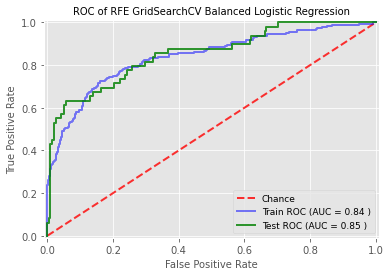

Train Data: Accuracy Score

0.7712585034013606


Train Data: Classification Report

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       988
           1       0.39      0.78      0.52       188

    accuracy                           0.77      1176
   macro avg       0.67      0.78      0.69      1176
weighted avg       0.86      0.77      0.80      1176



Train Data: Kappa Cohen Score

0.3929163596168017


Train Data: Confusion Matrix

[[760 228]
 [ 41 147]]


Train Data: Jaccard Score

0.35336538461538464
Test Data: Accuracy Score

0.7585034013605442


Test Data: Classification Report

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       245
           1       0.39      0.78      0.52        49

    accuracy                           0.76       294
   macro avg       0.67      0.77      0.68       294
weighted avg       0.85      0.76      0.79       294



Test Data: Kappa Cohen

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                        0.869735      0.844065   
Balanced Decision Tree                              1.000000      0.606122   
Balanced Random Forest                              1.000000      0.773053   
Balanced Support Vector Machine                     0.867861      0.834486   
GridSearchCV Balanced Logistic Regression           0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine        0.860114      0.845065   
Balanced Bagged Logistic Regression                 0.858956      0.846980   
Balanced Bagged Decision Tree                       1.000000      0.724531   
Balanced Bagged Random Forest                       0.999989      0.782507   
Balanced Bagged Support Vector Machine              0.863269      0.846231   
Balanced AdaBoosted Logistic Regression             0.811283      0.787755   
AdaBoosted Decision Tree                            1.000000      0.591837   
Balanced AdaBoosted Random Forest                   1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine          0.813889      0.795085   
Balanced GradientBoosted Decision Tree              0.954696      0.778426   
SMOTE Logistic Regression                           0.887083      0.844315   
SMOTE Decision Tree                                 1.000000      0.638776   
SMOTE Random Forest                                 1.000000      0.831029   
SMOTE Support Vector Machine                        0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression              0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine           1.000000      0.773844   
SMOTE Bagged Logistic Regression                    0.887359      0.847813   
SMOTE Bagged Decision Tree                          1.000000      0.738859   
SMOTE Bagged Random Forest                          0.999999      0.827572   
SMOTE Bagged Support Vector Machine                 1.000000      0.789921   
SMOTE AdaBoosted Logistic Regression                0.868513      0.847480   
SMOTE AdaBoosted Decision Tree                      1.000000      0.651020   
SMOTE AdaBoosted Random Forest                      1.000000      0.823657   
SMOTE AdaBoosted Support Vector Machine             1.000000      0.790504   
SMOTE GradientBoosted Decision Tree                 0.987246      0.796418   
RFE GridSearchCV Balanced Logistic Regression       0.839666      0.853228   

                                               Acc Train  Acc Test  \
Balanced Logistic Regression                    0.784864  0.765306   
Balanced Decision Tree                          1.000000  0.778912   
Balanced Random Forest                          1.000000  0.840136   
Balanced Support Vector Machine                 0.791667  0.772109   
GridSearchCV Balanced Logistic Regression       0.772959  0.785714   
GridSearchCV Balanced Support Vector Machine    0.778061  0.775510   
Balanced Bagged Logistic Regression             0.787415  0.789116   
Balanced Bagged Decision Tree                   1.000000  0.833333   
Balanced Bagged Random Forest                   0.956633  0.840136   
Balanced Bagged Support Vector Machine          0.880102  0.867347   
Balanced AdaBoosted Logistic Regression         0.159864  0.166667   
AdaBoosted Decision Tree                        1.000000  0.782313   
Balanced AdaBoosted Random Forest               1.000000  0.843537   
Balanced AdaBoosted Support Vector Machine      0.840136  0.833333   
Balanced GradientBoosted Decision Tree          0.920068  0.860544   
SMOTE Logistic Regression                       0.818320  0.755102   
SMOTE Decision Tree                             1.000000  0.792517   
SMOTE Random Forest                             1.000000  0.867347   
SMOTE Support Vector Machine                    0.816802  0.778912   
GridSearchCV SMOTE Logistic Regression          0.811741  0.755102   
GridSearchCV SMOTE Support Vector Machine       1.000000  0.816327   
SMOTE Bagg

In [173]:
# rfe_adb_logit_smote = AdaBoostClassifier(base_estimator=logit_smote, n_estimators= 50, random_state=0)

# default parameters

models = []
models.append(('RFE GridSearchCV Balanced Logistic Regression',best_logit))

fit_predict_plot(X_train,X_test,y_train,y_test,models)

In [174]:
dfObj

AUC ROC Train  AUC ROC Test  \
Balanced Logistic Regression                        0.869735      0.844065   
Balanced Decision Tree                              1.000000      0.606122   
Balanced Random Forest                              1.000000      0.773053   
Balanced Support Vector Machine                     0.867861      0.834486   
GridSearchCV Balanced Logistic Regression           0.859888      0.851812   
GridSearchCV Balanced Support Vector Machine        0.860114      0.845065   
Balanced Bagged Logistic Regression                 0.858956      0.846980   
Balanced Bagged Decision Tree                       1.000000      0.724531   
Balanced Bagged Random Forest                       0.999989      0.782507   
Balanced Bagged Support Vector Machine              0.863269      0.846231   
Balanced AdaBoosted Logistic Regression             0.811283      0.787755   
AdaBoosted Decision Tree                            1.000000      0.591837   
Balanced AdaBoosted Random Forest                   1.000000      0.750646   
Balanced AdaBoosted Support Vector Machine          0.813889      0.795085   
Balanced GradientBoosted Decision Tree              0.954696      0.778426   
SMOTE Logistic Regression                           0.887083      0.844315   
SMOTE Decision Tree                                 1.000000      0.638776   
SMOTE Random Forest                                 1.000000      0.831029   
SMOTE Support Vector Machine                        0.887109      0.836152   
GridSearchCV SMOTE Logistic Regression              0.886625      0.850062   
GridSearchCV SMOTE Support Vector Machine           1.000000      0.773844   
SMOTE Bagged Logistic Regression                    0.887359      0.847813   
SMOTE Bagged Decision Tree                          1.000000      0.738859   
SMOTE Bagged Random Forest                          0.999999      0.827572   
SMOTE Bagged Support Vector Machine                 1.000000      0.789921   
SMOTE AdaBoosted Logistic Regression                0.868513      0.847480   
SMOTE AdaBoosted Decision Tree                      1.000000      0.651020   
SMOTE AdaBoosted Random Forest                      1.000000      0.823657   
SMOTE AdaBoosted Support Vector Machine             1.000000      0.790504   
SMOTE GradientBoosted Decision Tree                 0.987246      0.796418   
RFE GridSearchCV Balanced Logistic Regression       0.839666      0.853228   

                                               Acc Train  Acc Test  \
Balanced Logistic Regression                    0.784864  0.765306   
Balanced Decision Tree                          1.000000  0.778912   
Balanced Random Forest                          1.000000  0.840136   
Balanced Support Vector Machine                 0.791667  0.772109   
GridSearchCV Balanced Logistic Regression       0.772959  0.785714   
GridSearchCV Balanced Support Vector Machine    0.778061  0.775510   
Balanced Bagged Logistic Regression             0.787415  0.789116   
Balanced Bagged Decision Tree                   1.000000  0.833333   
Balanced Bagged Random Forest                   0.956633  0.840136   
Balanced Bagged Support Vector Machine          0.880102  0.867347   
Balanced AdaBoosted Logistic Regression         0.159864  0.166667   
AdaBoosted Decision Tree                        1.000000  0.782313   
Balanced AdaBoosted Random Forest               1.000000  0.843537   
Balanced AdaBoosted Support Vector Machine      0.840136  0.833333   
Balanced GradientBoosted Decision Tree          0.920068  0.860544   
SMOTE Logistic Regression                       0.818320  0.755102   
SMOTE Decision Tree                             1.000000  0.792517   
SMOTE Random Forest                             1.000000  0.867347   
SMOTE Support Vector Machine                    0.816802  0.778912   
GridSearchCV SMOTE Logistic Regression          0.811741  0.755102   
GridSearchCV SMOTE Support Vector Machine       1.000000  0.816327   
SMOTE Bagg

In [175]:
dfObj.shape

(31, 14)

In [176]:
# We see that Hyper-Parameter Tuned Logistic Regression using Class Balancing gives the better result.
# Since Logistic Regression is the best model, we will try to improve it using backward elimination using OLS.